## Module 6 : Project 1 (Regression for Numeric data)
### Members: Aishwarya Deshmane, Dengyi Liu, Xin Xiang, Yuchen Wang

### Introduction:

The dataset consists the information pertaining to NY State High School graduation metrics for the 2018-2019 school year. It has around 73,000 observations and 29 columns. The data is associated with subgroupings/categorizations of high school students enrolled for atleast 4 years as of the end of the 2018-19 school year

__Task:__
- To predict the number of students droping out of the school using provided information

__Approach to this study:__
- Exploratory data analysis
- Data Preparation
- Dimensionality reduction
- Regression models
- Conclusion

In [222]:
#Load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import math
from numpy import random
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [223]:
#Read the file
path = 'https://raw.githubusercontent.com/DengyiLiu/Data-Science-Project-1/main/Project1_Data.csv'
data = pd.read_csv(path)

In [224]:
data

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,91,14%,16,2%,30,5%,0,0%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,47,15%,2,1%,11,3%,0,0%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,44,13%,14,4%,19,6%,0,0%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,-,-,-,-,-,-,-,-,-,-
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,23,6%,10,3%,18,5%,0,0%,91,25%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73147,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-,-,-,-,-,-,-,-,-,-
73148,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-,-,-,-,-,-,-,-,-,-
73149,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-,-,-,-,-,-,-,-,-,-
73150,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-,-,-,-,-,-,-,-,-,-


In [225]:
#check the shape
data.shape

(73152, 29)

In [226]:
#check sum of the null values
data.isnull().sum()

report_school_year            0
aggregation_index             0
aggregation_type              0
aggregation_name              0
nrc_code                      0
nrc_desc                      0
county_code                   0
county_name                   0
nyc_ind                       0
membership_desc               0
subgroup_code                 0
subgroup_name                 0
enroll_cnt                    0
grad_cnt                      0
grad_pct                      0
local_cnt                     0
local_pct                     0
reg_cnt                       0
reg_pct                       0
reg_adv_cnt                   0
reg_adv_pct                   0
non_diploma_credential_cnt    0
non_diploma_credential_pct    0
still_enr_cnt                 0
still_enr_pct                 0
ged_cnt                       0
ged_pct                       0
dropout_cnt                   0
dropout_pct                   0
dtype: int64

In [227]:
#check the datatypes of the values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   report_school_year          73152 non-null  object
 1   aggregation_index           73152 non-null  int64 
 2   aggregation_type            73152 non-null  object
 3   aggregation_name            73152 non-null  object
 4   nrc_code                    73152 non-null  int64 
 5   nrc_desc                    73152 non-null  object
 6   county_code                 73152 non-null  int64 
 7   county_name                 73152 non-null  object
 8   nyc_ind                     73152 non-null  int64 
 9   membership_desc             73152 non-null  object
 10  subgroup_code               73152 non-null  int64 
 11  subgroup_name               73152 non-null  object
 12  enroll_cnt                  73152 non-null  object
 13  grad_cnt                    73152 non-null  ob

There are no null values in the data as per info but if you look closely, you will find "-"(hyphen/dash) in the obervations. Few also has "%"(percentage) sign

That's the reason it says object datatype in the information for columns 12 to 28

Let's replace the "-" with 0 and "%" with nothing and convert it to numeric datatype. This would help us in Exploratory data analysis and building graphs

In [228]:
data.replace('-',0,inplace = True)
data = data.replace('%','',regex = True)

In [229]:
data

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,91,14,16,2,30,5,0,0,148,22
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,47,15,2,1,11,3,0,0,65,20
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,44,13,14,4,19,6,0,0,83,25
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,0,0,0,0,0,0,0,0,0,0
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,23,6,10,3,18,5,0,0,91,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73147,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,0,0,0,0,0,0,0,0,0,0
73148,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,0,0,0,0,0,0,0,0,0,0
73149,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,0,0,0,0,0,0,0,0,0,0
73150,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,0,0,0,0,0,0,0,0,0,0


In [230]:
#change the data-types of the cnt and pct columns from objects to numeric
data.iloc[:,12:29]= data.iloc[:,12:29].apply(pd.to_numeric)

In [231]:
data.iloc[:,12:29]

,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,658,464,71,63,10,310,47,91,14,16,2,30,5,0,0,148,22
1,324,246,76,30,9,169,52,47,15,2,1,11,3,0,0,65,20
2,334,218,65,33,10,141,42,44,13,14,4,19,6,0,0,83,25
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,367,248,68,42,11,183,50,23,6,10,3,18,5,0,0,91,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
73148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
73149,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
73150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   report_school_year          73152 non-null  object
 1   aggregation_index           73152 non-null  int64 
 2   aggregation_type            73152 non-null  object
 3   aggregation_name            73152 non-null  object
 4   nrc_code                    73152 non-null  int64 
 5   nrc_desc                    73152 non-null  object
 6   county_code                 73152 non-null  int64 
 7   county_name                 73152 non-null  object
 8   nyc_ind                     73152 non-null  int64 
 9   membership_desc             73152 non-null  object
 10  subgroup_code               73152 non-null  int64 
 11  subgroup_name               73152 non-null  object
 12  enroll_cnt                  73152 non-null  int64 
 13  grad_cnt                    73152 non-null  in

In [233]:
#overview of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
aggregation_index,73152.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0
nrc_code,73152.0,4.588583,1.203507,1.0,4.0,5.0,5.0,6.0
county_code,73152.0,36.251859,20.588044,1.0,17.0,40.0,57.0,68.0
nyc_ind,73152.0,0.055255,0.228479,0.0,0.0,0.0,0.0,1.0
subgroup_code,73152.0,12.000930,7.213138,1.0,6.0,11.0,18.0,25.0
enroll_cnt,73152.0,104.196358,337.855150,0.0,0.0,9.0,76.0,9176.0
grad_cnt,73152.0,87.415108,277.925141,0.0,0.0,7.0,66.0,7540.0
grad_pct,73152.0,45.777942,43.608471,0.0,0.0,60.0,90.0,100.0
local_cnt,73152.0,6.693091,24.387913,0.0,0.0,0.0,4.0,557.0
local_pct,73152.0,4.599095,8.745939,0.0,0.0,0.0,6.0,100.0


### Exploratory data Analysis:

<AxesSubplot:>

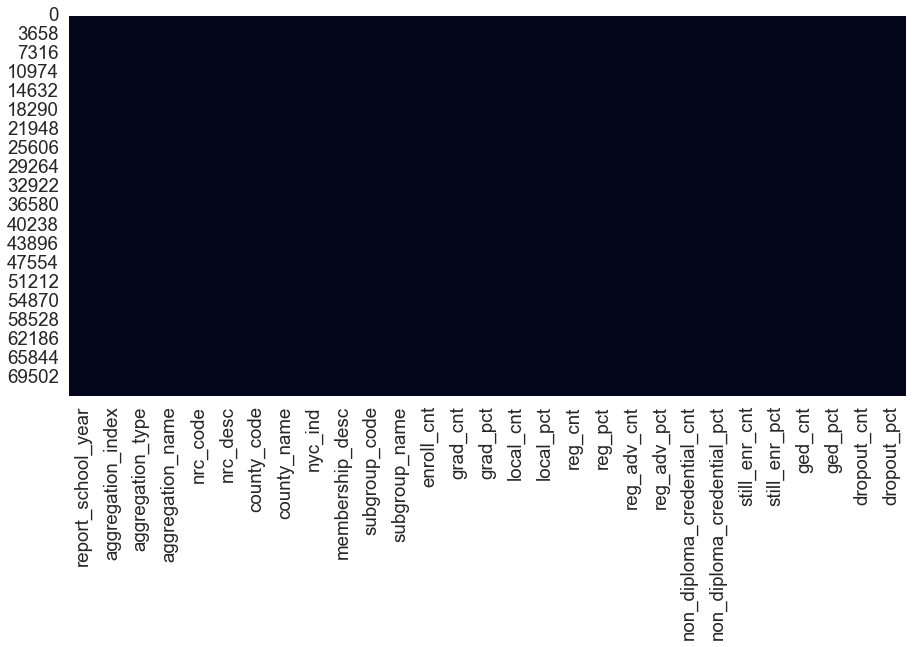

In [234]:
#see the distribution of the null values
plt.figure(figsize=(15,7))
sns.heatmap(data.isnull(),cbar=False)

In [235]:
#check if any duplicated rows
data.duplicated().sum()

0

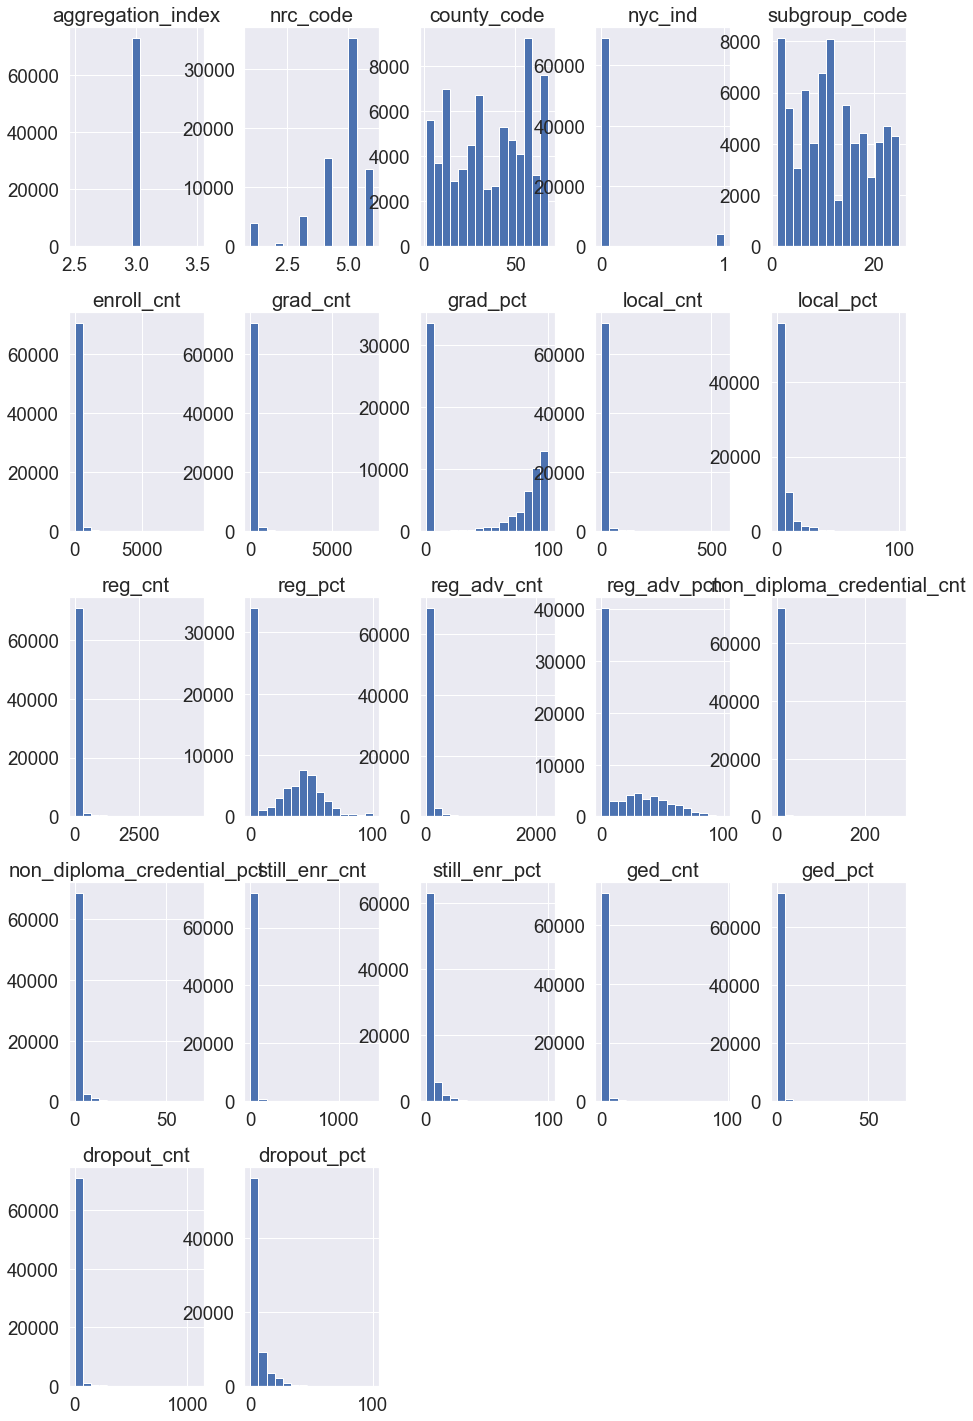

In [236]:
#plot the histograms for all the attributes and see how widely the data is distributed
data.hist(bins = 15,figsize=(15,25));

In [237]:
numeric_cols = data.select_dtypes(include=['int64','float64']).columns

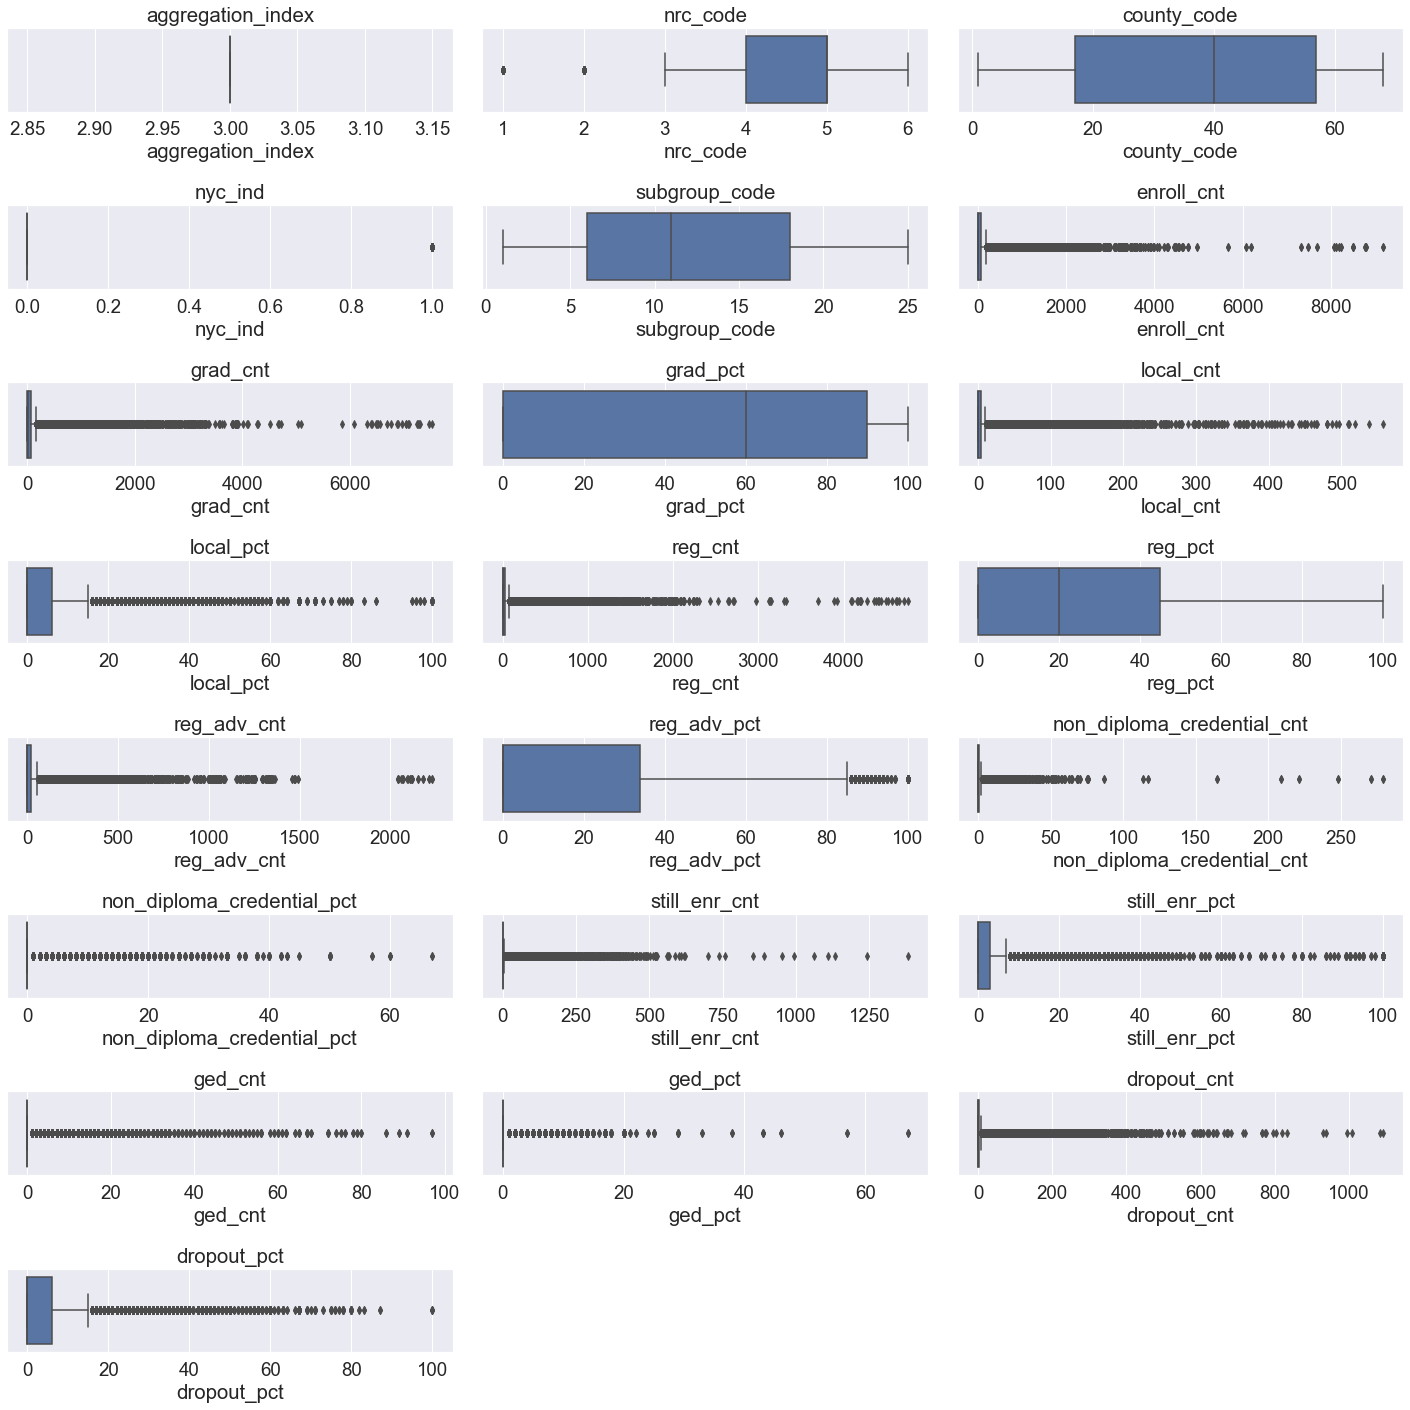

In [238]:
# This functions plots the boxplot of the data
 
plt.figure(figsize=(20,20))
for i,col in enumerate(numeric_cols):
    plt.subplot(math.ceil(len(numeric_cols)/3),3,i+1)
    sns.boxplot(data[col])
    plt.tight_layout()
    plt.title(col)

In the above box plots we can see that many data points lie outside the 4th quartile but these are not outliers. There is no specific range we can define to calculate the drop out counts and so we are not consider any observations as outliers

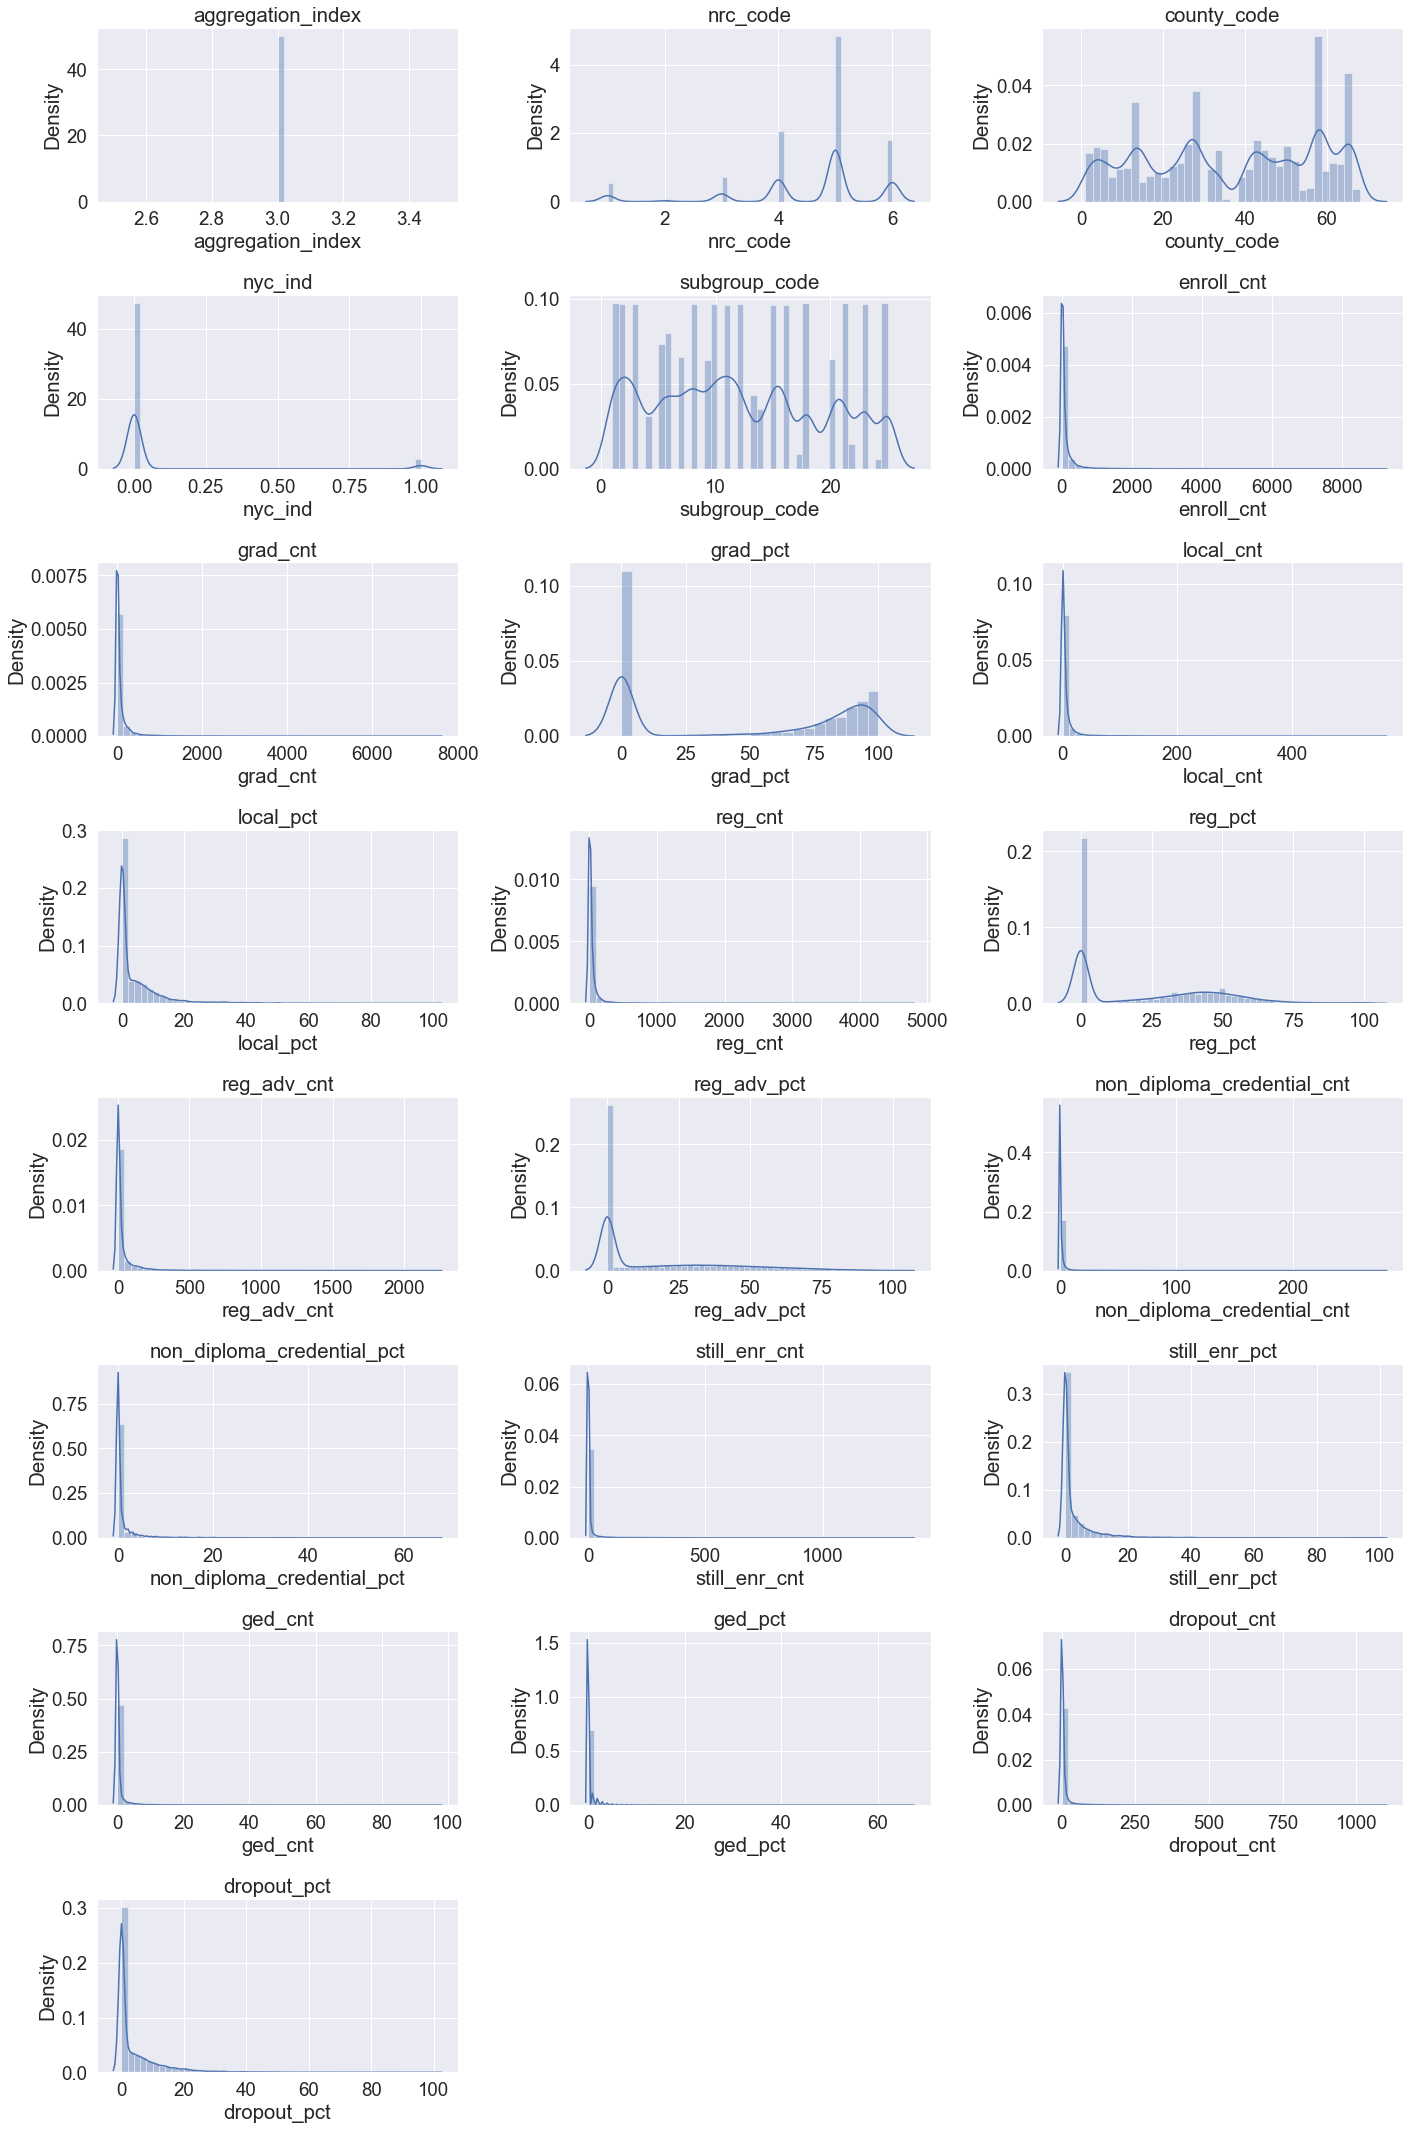

In [239]:
#This functions plots the estimated probability density function of the data

plt.figure(figsize=(20,30))
for i,col in enumerate(numeric_cols):
    plt.subplot(math.ceil(len(numeric_cols)/3),3,i+1)
    sns.distplot(data[col],label=col,kde=True)
    plt.tight_layout()
    plt.title(col)

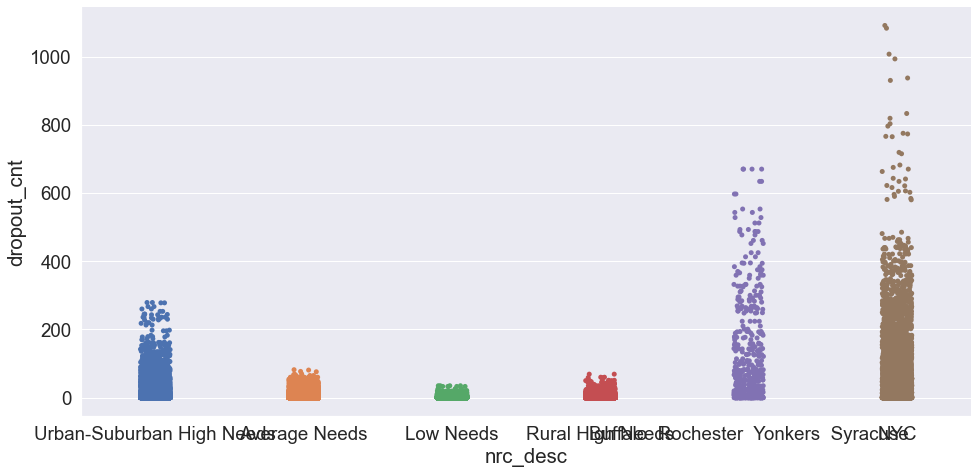

In [240]:
sns.catplot(data = data, x = 'nrc_desc',y = 'dropout_cnt',height = 7,aspect = 2)

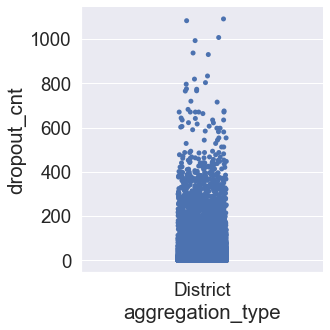

In [241]:
sns.catplot(data = data, x = 'aggregation_type',y = 'dropout_cnt')

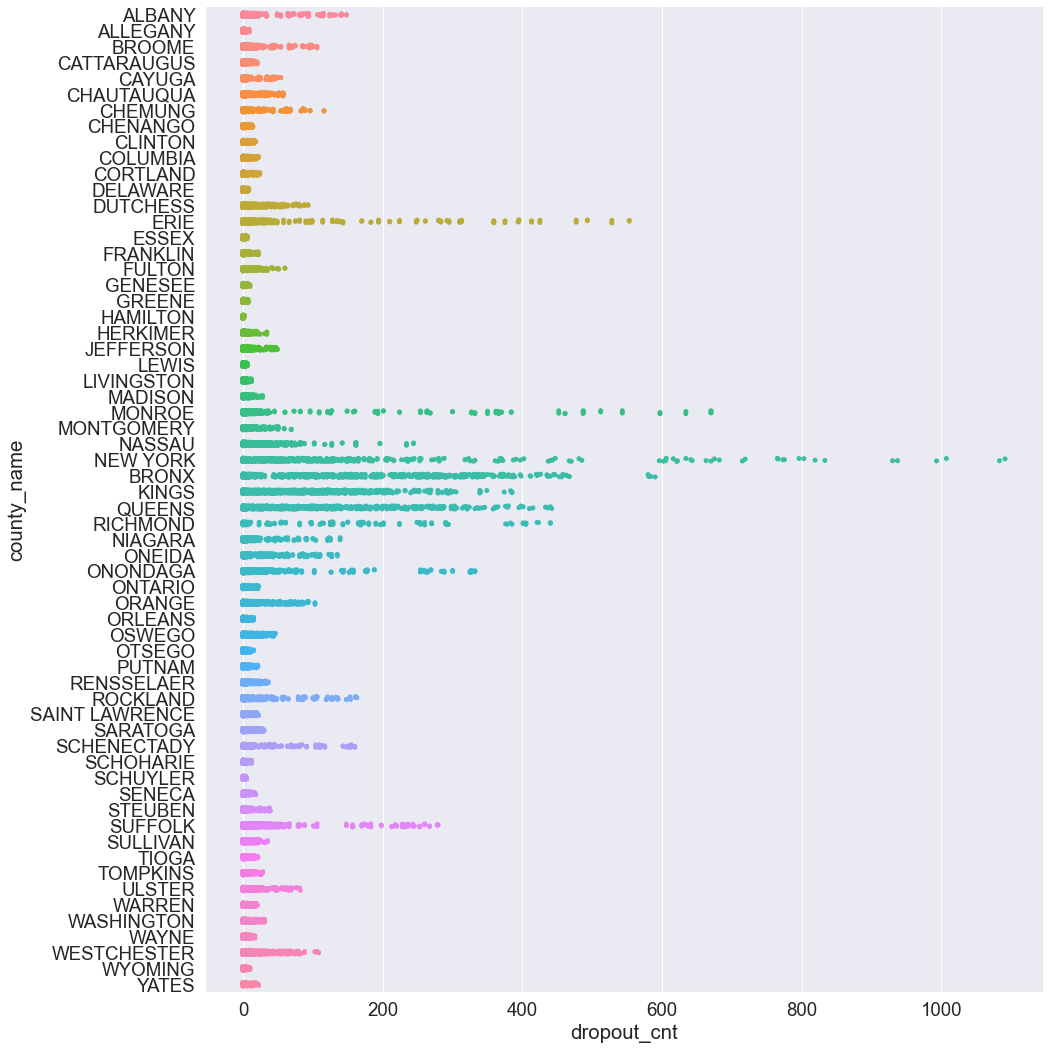

In [242]:
sns.catplot(data = data, x = 'dropout_cnt',y = 'county_name',height = 15,aspect = 1)

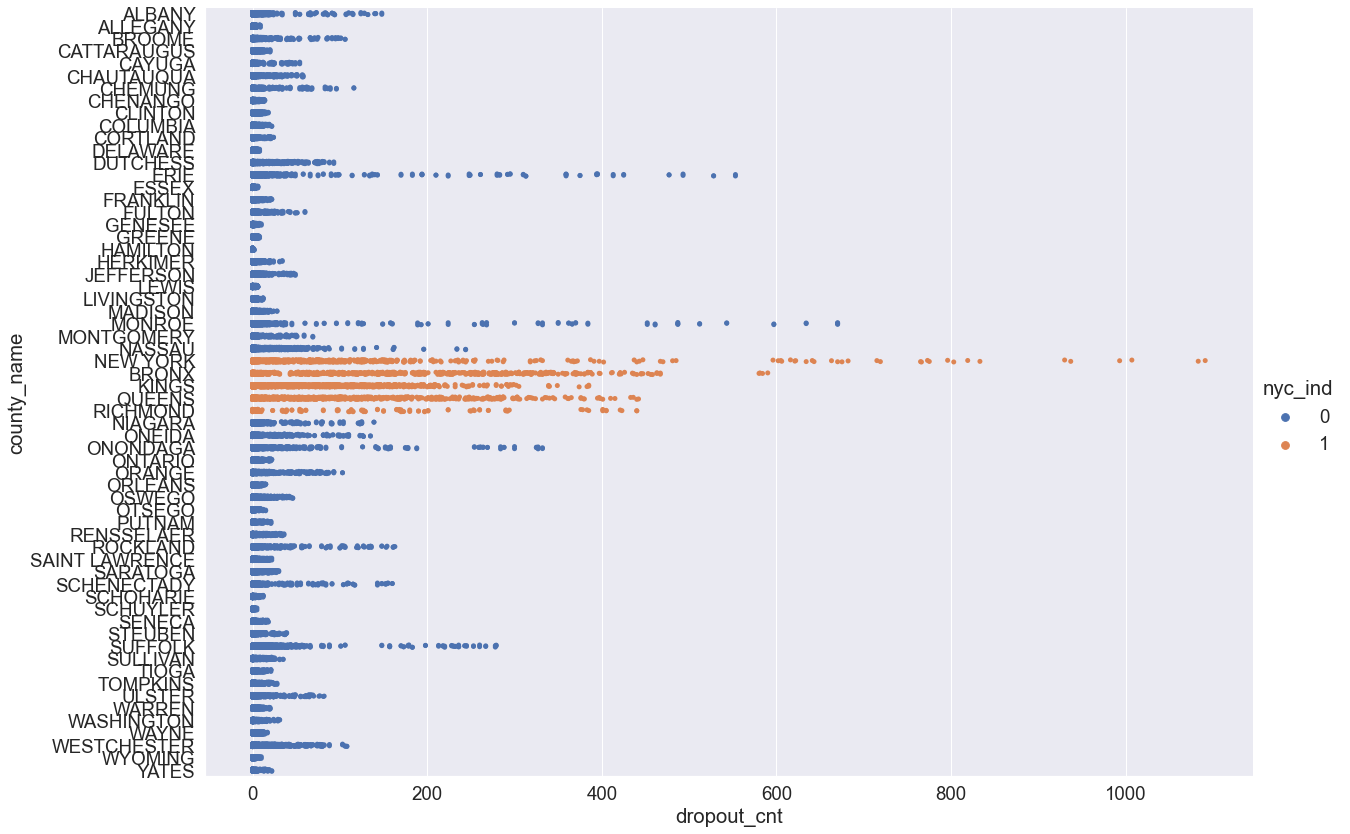

In [243]:
sns.catplot(data = data, x = 'dropout_cnt',y = 'county_name',hue = 'nyc_ind',height = 12,aspect = 1.5)

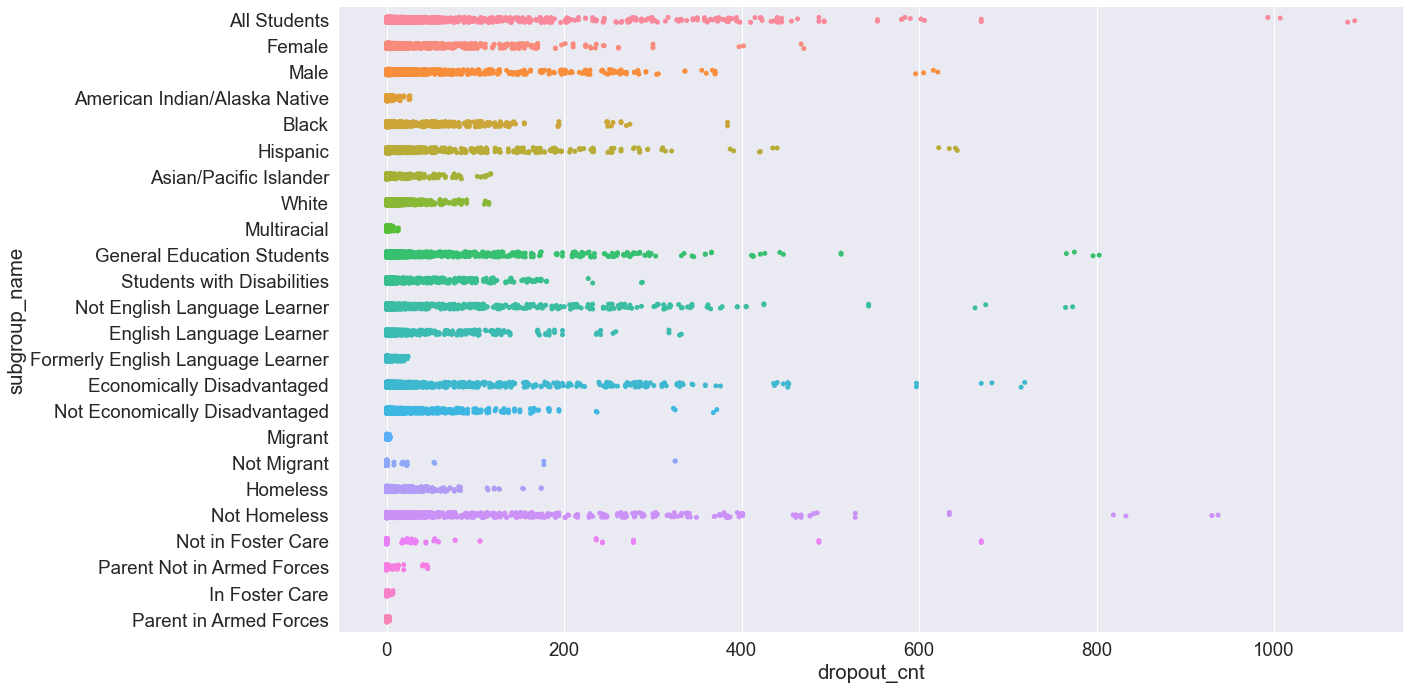

In [244]:
sns.set(font_scale = 1.7)
sns.catplot(data = data, x = 'dropout_cnt',y = 'subgroup_name',height = 10,aspect = 2)

In [245]:
data.corr()

,aggregation_index,nrc_code,county_code,nyc_ind,subgroup_code,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
aggregation_index,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nrc_code,NaN,1.000000,0.155944,-0.721116,-0.001332,-0.370565,-0.336467,-0.034387,-0.429640,-0.133733,...,-0.156041,0.165406,-0.317492,-0.074809,-0.388245,-0.219711,-0.378202,-0.097500,-0.445615,-0.311863
county_code,NaN,0.155944,1.000000,-0.041471,-0.003399,0.001552,0.006957,0.034183,-0.006407,0.019055,...,0.008331,0.006825,-0.025674,-0.035170,-0.009311,0.013924,-0.030112,-0.013567,-0.023348,-0.009952
nyc_ind,NaN,-0.721116,-0.041471,1.000000,-0.012789,0.478901,0.454320,0.088602,0.495446,0.087009,...,0.298201,-0.048415,0.368042,0.024688,0.452959,0.203824,0.452496,0.091765,0.481883,0.198903
subgroup_code,NaN,-0.001332,-0.003399,-0.012789,1.000000,-0.118748,-0.124014,-0.487166,-0.097771,-0.174478,...,-0.139547,-0.399670,-0.078376,-0.097644,-0.066463,-0.125261,-0.071778,-0.081408,-0.078063,-0.153404
enroll_cnt,NaN,-0.370565,0.001552,0.478901,-0.118748,1.000000,0.994110,0.269610,0.842651,0.064326,...,0.850731,0.192175,0.536194,0.003155,0.771267,0.134991,0.820073,0.079630,0.853826,0.156408
grad_cnt,NaN,-0.336467,0.006957,0.454320,-0.124014,0.994110,1.000000,0.287364,0.805355,0.050713,...,0.889396,0.227316,0.506151,-0.005699,0.720122,0.106473,0.790297,0.069509,0.806139,0.125488
grad_pct,NaN,-0.034387,0.034183,0.088602,-0.487166,0.269610,0.287364,1.000000,0.205908,0.397227,...,0.332443,0.784638,0.150502,0.173044,0.129784,0.184075,0.146829,0.135805,0.157069,0.291551
local_cnt,NaN,-0.429640,-0.006407,0.495446,-0.097771,0.842651,0.805355,0.205908,1.000000,0.217713,...,0.556316,0.043863,0.606899,0.061850,0.713567,0.186108,0.776500,0.097173,0.877363,0.237296
local_pct,NaN,-0.133733,0.019055,0.087009,-0.174478,0.064326,0.050713,0.397227,0.217713,1.000000,...,-0.012666,0.012773,0.148227,0.393426,0.084003,0.300585,0.072139,0.133485,0.107574,0.391219


<AxesSubplot:>

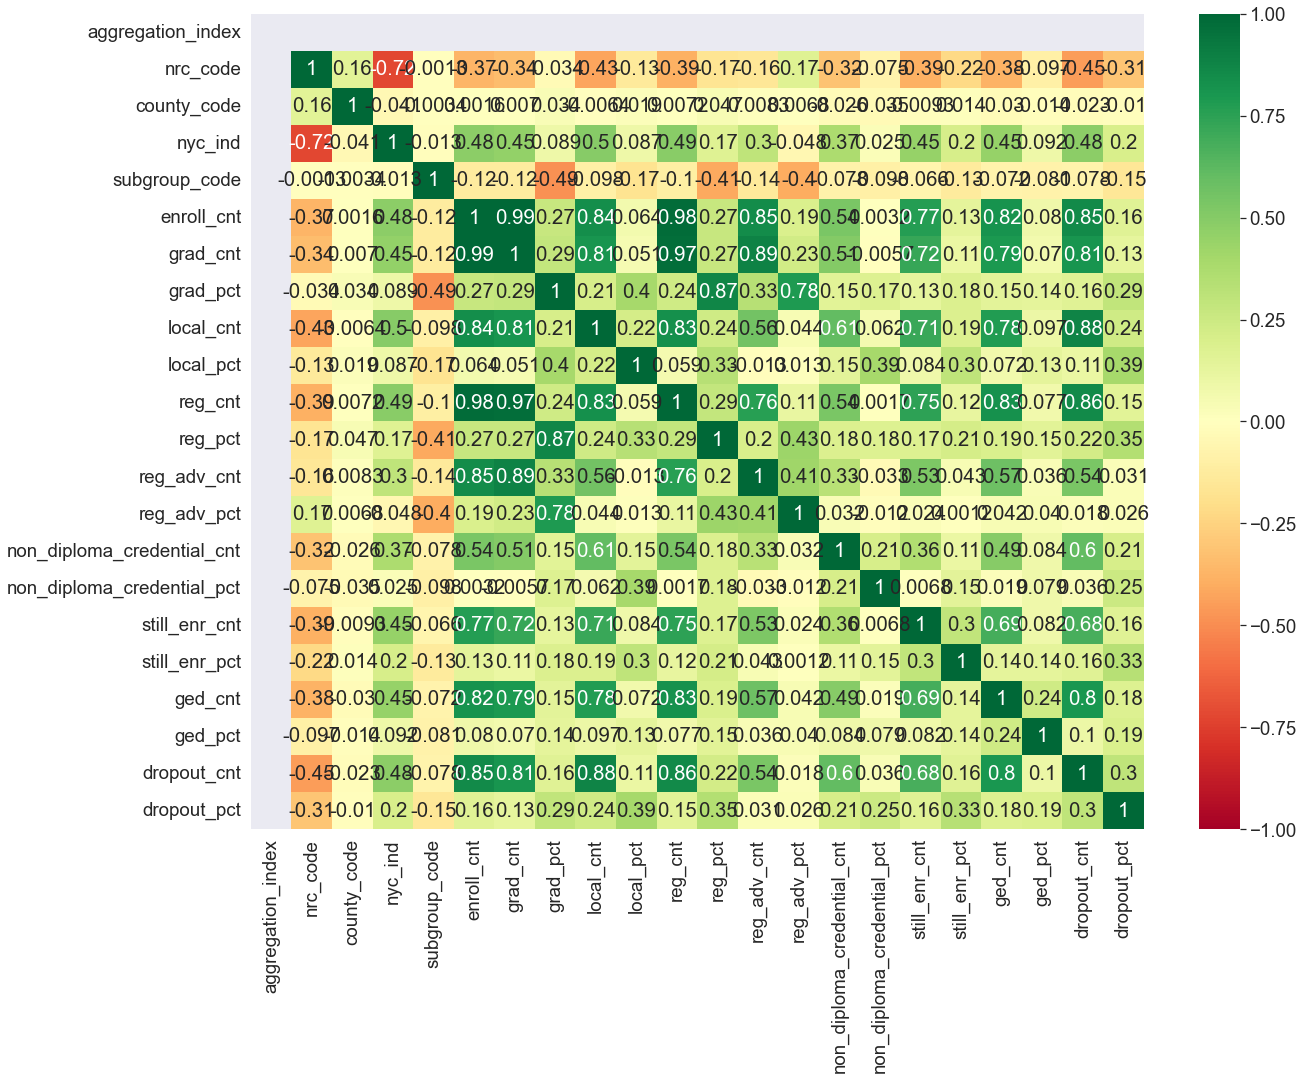

In [246]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),cmap='RdYlGn',vmin = -1, vmax = 1,annot=True)

__Correlation between the dropout_cnt(response variable) and explanatory variables:__
- Dropout_cnt has `strong positive correlation` with `enroll_cnt, grad_cnt, local_cnt, reg_cnt, ged_cnt variables`. The correlation value is `greater than 0.80`
- Dropout_cnt has `mild positive correlation` with `nyc_id, reg_adv_cnt, non_diploma_credential_cnt and still_enr_cnt`. The correlation value here lies `between 0.40 and 0.80`

__Very strong correlation between explanatory variables:__
- enroll_cnt vs grad_cnt
- enroll_cnt vs reg_cnt
- grad_cnt vs reg_cnt

In [247]:
#considering explanatory variables with good correlation and doing regression plot
var = ['enroll_cnt', 'grad_cnt', 'local_cnt', 'reg_cnt', 'ged_cnt',
       'nyc_ind', 'reg_adv_cnt', 'non_diploma_credential_cnt', 'still_enr_cnt']

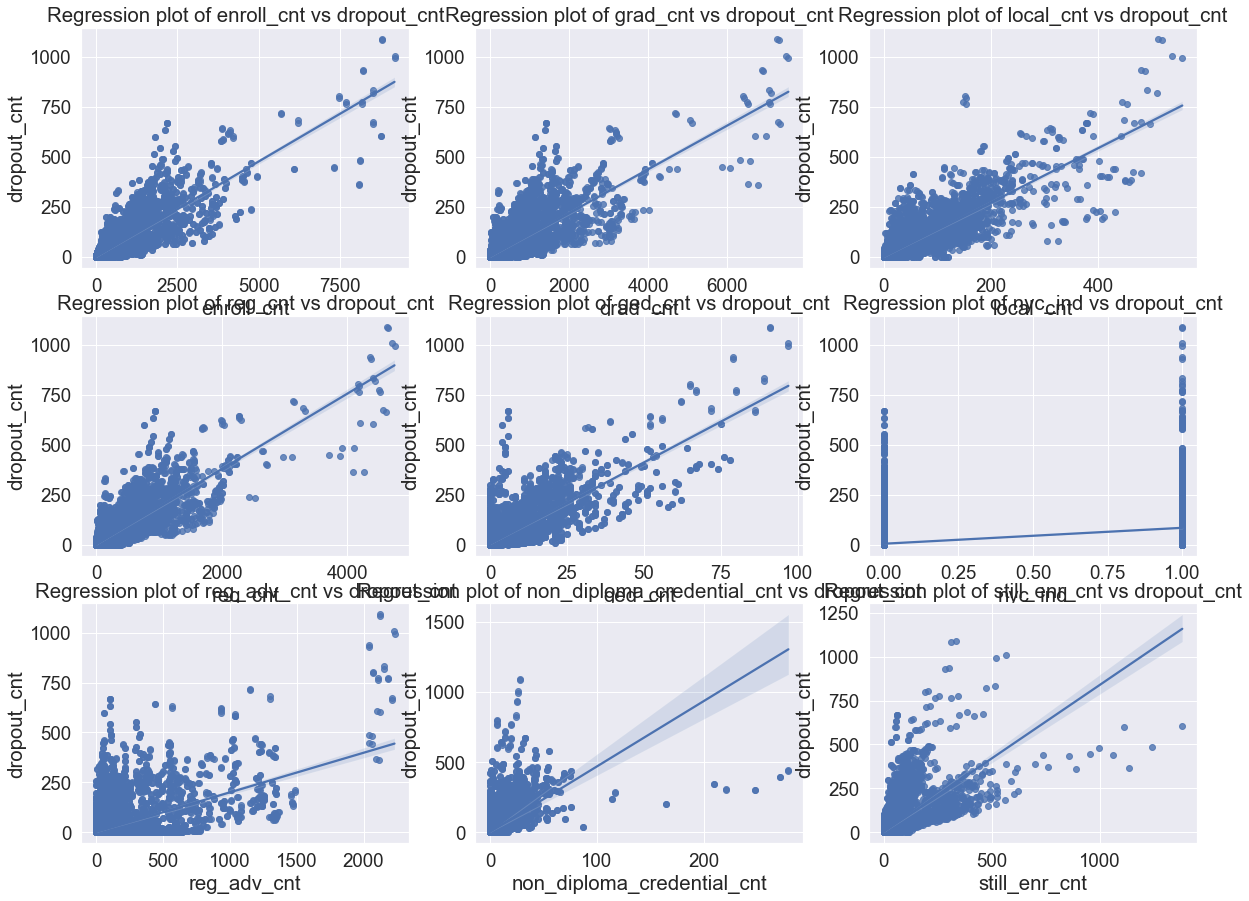

In [248]:
plt.figure(figsize=(20,15))
for i,v in enumerate(var):
    plt.subplot(math.ceil(len(var)/3),3,i+1)
    sns.regplot(x=v, y="dropout_cnt",data = data).set(title=f'Regression plot of {v} vs dropout_cnt')
    #plt.tight_layout()

### Data Preparation and Dimensionality reduction:

Now let's prepare the data and reduce the dimensions using different techniques

In [249]:
#check columns
data.columns

Index(['report_school_year', 'aggregation_index', 'aggregation_type',
       'aggregation_name', 'nrc_code', 'nrc_desc', 'county_code',
       'county_name', 'nyc_ind', 'membership_desc', 'subgroup_code',
       'subgroup_name', 'enroll_cnt', 'grad_cnt', 'grad_pct', 'local_cnt',
       'local_pct', 'reg_cnt', 'reg_pct', 'reg_adv_cnt', 'reg_adv_pct',
       'non_diploma_credential_cnt', 'non_diploma_credential_pct',
       'still_enr_cnt', 'still_enr_pct', 'ged_cnt', 'ged_pct', 'dropout_cnt',
       'dropout_pct'],
      dtype='object')

Data has count and percentage columns here which provides the same information. Better to get rid of the percentages column

It is very important to get rid of the dropout percentage column because it provides the same information as dropout count. This would be a good model as it would avoid leaking the information of the response variable while training and testing the data

In [250]:
#filter the columns with variables having "_pct" in it
col1 = list(data.filter(like = '_pct', axis = 1).columns)

In [251]:
col1

['grad_pct',
 'local_pct',
 'reg_pct',
 'reg_adv_pct',
 'non_diploma_credential_pct',
 'still_enr_pct',
 'ged_pct',
 'dropout_pct']

In [252]:
#assign the data without col1 columns in it
df1 = data.iloc[:,~data.columns.isin(col1)]

In [253]:
#check the shape
df1.shape

(73152, 21)

Now remove the columns with very strong correlation with each other. In our case we have enroll_cnt, grad_cnt and reg_cnt having very strong positive relationship of more than 97% and is providing almost same information

In [254]:
#assign the strong correlated columns to col2
col2 = ['grad_cnt','reg_cnt']

In [255]:
#assign the data without col2 columns in it
df2 = df1.iloc[:,~df1.columns.isin(col2)]

In [256]:
df2.shape

(73152, 19)

In [257]:
df2

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,local_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658,63,91,16,30,0,148
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324,30,47,2,11,0,65
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334,33,44,14,19,0,83
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,4,American Indian/Alaska Native,0,0,0,0,0,0,0
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367,42,23,10,18,0,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73147,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,18,Not Migrant,0,0,0,0,0,0,0
73148,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,20,Homeless,0,0,0,0,0,0,0
73149,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,21,Not Homeless,0,0,0,0,0,0,0
73150,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,23,Not in Foster Care,0,0,0,0,0,0,0


We can now get rid of:
- report_school_year, as the data is only for 2018-19 and is not adding any value
- aggregation_index and aggregation_type, as it has only 1 type "District"
- aggregation_name and county_name, as the same information can be captured from county_code
- nrc_desc, as we have nrc_code
- subgroup_name, as it has its information captured in subgroup_code

It is wise to keep data in numeric form

In [258]:
#assign the above mentioned columns to col3
col3 = ['report_school_year','aggregation_index','aggregation_type','aggregation_name','county_name',
       'nrc_desc', 'subgroup_name']
df3 = df2.iloc[:,~df2.columns.isin(col3)]
df3.shape

(73152, 12)

In [259]:
df3

,nrc_code,county_code,nyc_ind,membership_desc,subgroup_code,enroll_cnt,local_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt
0,3,1,0,2013 Total Cohort - 6 Year Outcome,1,658,63,91,16,30,0,148
1,3,1,0,2013 Total Cohort - 6 Year Outcome,2,324,30,47,2,11,0,65
2,3,1,0,2013 Total Cohort - 6 Year Outcome,3,334,33,44,14,19,0,83
3,3,1,0,2013 Total Cohort - 6 Year Outcome,4,0,0,0,0,0,0,0
4,3,1,0,2013 Total Cohort - 6 Year Outcome,5,367,42,23,10,18,0,91
...,...,...,...,...,...,...,...,...,...,...,...,...
73147,4,68,0,2013 Total Cohort - 6 Year Outcome - August 2019,18,0,0,0,0,0,0,0
73148,4,68,0,2013 Total Cohort - 6 Year Outcome - August 2019,20,0,0,0,0,0,0,0
73149,4,68,0,2013 Total Cohort - 6 Year Outcome - August 2019,21,0,0,0,0,0,0,0
73150,4,68,0,2013 Total Cohort - 6 Year Outcome - August 2019,23,0,0,0,0,0,0,0


Applying the domain knowledge, we have the reduced the dimensions from 29 to 12 without losing anything important. One can use the feature selecting methods for the dimensionality reduction but in this case, applying domain knowledge is best option

Many columns showing counts has all values 0 and makes no sense to keep those in our study. Let's assign the values with all values not zero to a new variable. This gives us around 40,000 observations

In [260]:
df3.iloc[:,5:]

,enroll_cnt,local_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt
0,658,63,91,16,30,0,148
1,324,30,47,2,11,0,65
2,334,33,44,14,19,0,83
3,0,0,0,0,0,0,0
4,367,42,23,10,18,0,91
...,...,...,...,...,...,...,...
73147,0,0,0,0,0,0,0
73148,0,0,0,0,0,0,0
73149,0,0,0,0,0,0,0
73150,0,0,0,0,0,0,0


In [261]:
#assign the data with no all values zero to new variable and reset the index
df4 = df3.loc[(df3.iloc[:,5:].T!=0).any()]
df4 = df4.reset_index(drop=True)
df4

,nrc_code,county_code,nyc_ind,membership_desc,subgroup_code,enroll_cnt,local_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt
0,3,1,0,2013 Total Cohort - 6 Year Outcome,1,658,63,91,16,30,0,148
1,3,1,0,2013 Total Cohort - 6 Year Outcome,2,324,30,47,2,11,0,65
2,3,1,0,2013 Total Cohort - 6 Year Outcome,3,334,33,44,14,19,0,83
3,3,1,0,2013 Total Cohort - 6 Year Outcome,5,367,42,23,10,18,0,91
4,3,1,0,2013 Total Cohort - 6 Year Outcome,6,98,13,5,4,8,0,28
...,...,...,...,...,...,...,...,...,...,...,...,...
39669,4,68,0,2013 Total Cohort - 6 Year Outcome - August 2019,3,36,2,3,1,1,0,9
39670,4,68,0,2013 Total Cohort - 6 Year Outcome - August 2019,10,48,3,8,0,0,0,5
39671,4,68,0,2013 Total Cohort - 6 Year Outcome - August 2019,11,13,0,0,3,2,0,6
39672,4,68,0,2013 Total Cohort - 6 Year Outcome - August 2019,15,33,0,3,3,0,0,7


Data consists of column membership_desc which provides in which year the student was enrolled in. It also provides the information of how many years the students is enrolled in

We can take the total years enrolled in high school information by splitting the string and adding a new column

After that we can get rid of the membership_desc column

In [262]:
df4['membership_desc'].head(10)

0    2013 Total Cohort - 6 Year Outcome
1    2013 Total Cohort - 6 Year Outcome
2    2013 Total Cohort - 6 Year Outcome
3    2013 Total Cohort - 6 Year Outcome
4    2013 Total Cohort - 6 Year Outcome
5    2013 Total Cohort - 6 Year Outcome
6    2013 Total Cohort - 6 Year Outcome
7    2013 Total Cohort - 6 Year Outcome
8    2013 Total Cohort - 6 Year Outcome
9    2013 Total Cohort - 6 Year Outcome
Name: membership_desc, dtype: object

In [263]:
#retrieve the total years from the membership_desc column and append it into new list
total_years=[]
for i in range(len(df4)):
    total_years.append(int(df4['membership_desc'][i].split(" ")[4]))

total_years

[6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,


In [264]:
#insert the with total years to index 3
df4.insert(3,"total_years",total_years)

In [265]:
#drop the column membership_desc and assign the data to df
df = df4.drop(['membership_desc'],axis = 1)
df

,nrc_code,county_code,nyc_ind,total_years,subgroup_code,enroll_cnt,local_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt
0,3,1,0,6,1,658,63,91,16,30,0,148
1,3,1,0,6,2,324,30,47,2,11,0,65
2,3,1,0,6,3,334,33,44,14,19,0,83
3,3,1,0,6,5,367,42,23,10,18,0,91
4,3,1,0,6,6,98,13,5,4,8,0,28
...,...,...,...,...,...,...,...,...,...,...,...,...
39669,4,68,0,6,3,36,2,3,1,1,0,9
39670,4,68,0,6,10,48,3,8,0,0,0,5
39671,4,68,0,6,11,13,0,0,3,2,0,6
39672,4,68,0,6,15,33,0,3,3,0,0,7


df is our final data and this is prepared with around 40,000 observations now with dimensions reduced to 12. It is a ready to go data for creating the model

### Regression models:

This is a count based data and non-negative integers. For count based data, Poisson regression model or negative binomial regression model are the best ones, and, using linear regression would not make much sense. Let's construct 6 models here:
- 2 for Poisson regression
- 2 for negative regression and
- 2 for multilinear regression

At the end we will compare all the models and see which model worked best for us

**Now, we are going to split the data into training dataset and test dataset, with the size of test 25%.**

In [266]:
X = df.drop('dropout_cnt',axis=1)
y = df['dropout_cnt']

seed = 42

x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=seed)

* We will use above seed of train/test data

### Part I: Multilinear Regression

#### I. OLS model

In [267]:
# add constant to both X train and X valid
X_train_with_constant = sm.add_constant(x_train)
X_valid_with_constant = sm.add_constant(x_valid)

In [268]:
# model building
model_MR = sm.OLS(y_train,X_train_with_constant).fit()
print(model_MR.summary())

                            OLS Regression Results                            
Dep. Variable:            dropout_cnt   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                 2.056e+04
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        01:55:42   Log-Likelihood:            -1.2737e+05
No. Observations:               29755   AIC:                         2.548e+05
Df Residuals:                   29743   BIC:                         2.549e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

#### Now, let's check the linear regression assumptions

**Check the following Linear Regression assumptions:**

1. No Multicollinearity

2. Linearity of variables

3. Independence of error terms

4. Normality of error terms

5. No Heteroscedasticity

### 1.1.1 Test for multicollinearity

- **Test multicollinearity with VIF**
- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

In [269]:
# Define a function that can return the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [270]:
#Now let's check the VIF
checking_vif(X_train_with_constant)

,feature,VIF
0,const,79.058998
1,nrc_code,2.874884
2,county_code,1.049624
3,nyc_ind,2.825445
4,total_years,1.077193
5,subgroup_code,1.007909
6,enroll_cnt,21.774886
7,local_cnt,5.172681
8,reg_adv_cnt,6.718324
9,non_diploma_credential_cnt,1.728972


**Observations**
- We can noticed that most of VIF are under 5, however, $enroll cnt$ and $reg adv cnt$ are above 5, especially $enroll cnt$ which is more than 20.

**Removing Multicollinearity**

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till all VIF scores under 5.

In [271]:
##Let's define a function that will help us do this.
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [272]:
#the list of high VIF columns
col_list = ['enroll_cnt','reg_adv_cnt']

treating_multicollinearity(X_train_with_constant,y_train,col_list)

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,reg_adv_cnt,0.837429,20.688361
1,enroll_cnt,0.814257,22.113631


In [273]:
#Drop the highest vif column
col_to_drop = 'reg_adv_cnt'
X_train2 = X_train_with_constant.loc[:,~X_train_with_constant.columns.str.startswith(col_to_drop)]
X_valid2 = X_valid_with_constant.loc[:,~X_valid_with_constant.columns.str.startswith(col_to_drop)]

#check the VIF again 
vif = checking_vif(X_train2)
vif

,feature,VIF
0,const,78.656657
1,nrc_code,2.719319
2,county_code,1.042321
3,nyc_ind,2.806187
4,total_years,1.073727
5,subgroup_code,1.007798
6,enroll_cnt,5.237849
7,local_cnt,4.306508
8,non_diploma_credential_cnt,1.672554
9,still_enr_cnt,2.849096


In [274]:
#enroll_cnt still has a vif score higher than 5, let's drop it now.
col_to_drop2 = 'enroll_cnt'
X_train3 = X_train2.loc[:,~X_train2.columns.str.startswith(col_to_drop2)]
X_valid3 = X_valid2.loc[:,~X_valid2.columns.str.startswith(col_to_drop2)]

#check the VIF again 
vif = checking_vif(X_train3)
vif

,feature,VIF
0,const,77.366314
1,nrc_code,2.655746
2,county_code,1.041726
3,nyc_ind,2.760190
4,total_years,1.067877
5,subgroup_code,1.007798
6,local_cnt,3.659094
7,non_diploma_credential_cnt,1.656169
8,still_enr_cnt,2.448657
9,ged_cnt,2.695356


* Now there is no feature has a vif score higher than 5.

### 1.1.2 Drop the high p-value variables

In [275]:
# initial list of columns
cols = X_train3.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train3[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'nrc_code', 'nyc_ind', 'total_years', 'local_cnt', 'non_diploma_credential_cnt', 'still_enr_cnt', 'ged_cnt']


**Now, create the model with the significant variables**

In [276]:
X_train4 = X_train3[selected_features]
X_valid4 = X_valid3[selected_features]

In [277]:
model_MR2 = sm.OLS(y_train,X_train4).fit()
print(model_MR2.summary())

                            OLS Regression Results                            
Dep. Variable:            dropout_cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                 1.853e+04
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        01:55:42   Log-Likelihood:            -1.3441e+05
No. Observations:               29755   AIC:                         2.688e+05
Df Residuals:                   29747   BIC:                         2.689e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

**Observations**
- After we remove the collinearity feature and drop the high p-value feature, the adj R-square was only 0.07 down than the original model which is good and has not adversely affected the model performance.
- This shows that these variables do not significantly impact the target variable.

### 1.1.3 Test for linearity and independence

- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [278]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = model_MR2.fittedvalues  # predicted values
df_pred["Residuals"] = model_MR2.resid  # residuals

df_pred.head(15)

,Actual Values,Fitted Values,Residuals
6744,58,26.303057,31.696943
7850,1,2.693067,-1.693067
2375,1,0.917290,0.082710
27171,2,9.100722,-7.100722
3517,1,8.300985,-7.300985
28413,4,12.080372,-8.080372
34409,10,17.376928,-7.376928
9774,1,2.518258,-1.518258
35055,3,7.731835,-4.731835
20481,1,5.275459,-4.275459


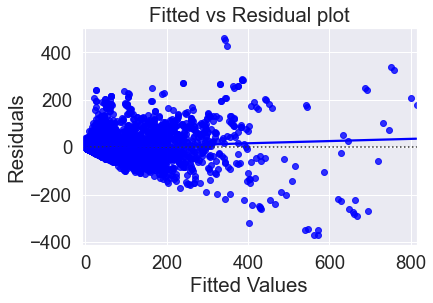

In [279]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="blue", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

**Observations**

- We see no pattern in the plot above.
- Hence, the assumptions of linearity and independence are satisfied.

### 1.1.4 test for normality

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

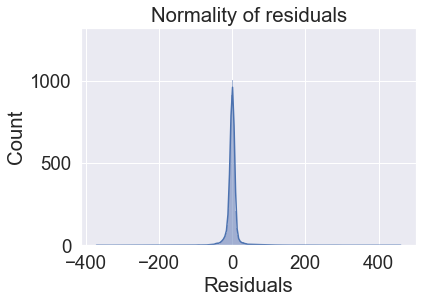

In [280]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

**Observations**

- The histogram of residuals has a bell shape structure.
- Let's check the Q-Q plot.

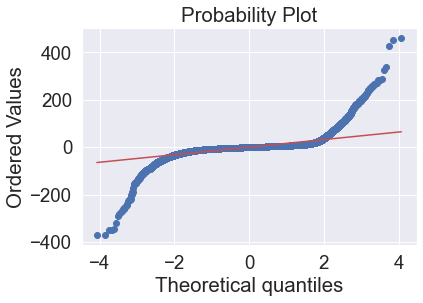

In [281]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

**Observations**

- The residuals almost follow a straight line.
- Let's check the results of the Shapiro-Wilk test.

In [282]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.5160275101661682, pvalue=0.0)

**Observations**

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- However, based on the distribution plot and Q-Q plot, we can consider the distribution to be a good approximation of the normal distribution.

### 1.1.5 test for homoscedasticity

- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [283]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train4)
lzip(name, test)

[('F statistic', 1.2118405061172783), ('p-value', 5.960592437397068e-32)]

**Observations**

- Since p-value < 0.05, the residuals are heteroscedastic.
- So, the assumption is **not** satisfied.

### Part II: Multilinear Regression with 'log' columns

* In this model, I will apply log function on severl columns which have a lot of outliers, and then see if there are some improve on the model, and also check if the model satisfied with linear regression assumptions.
* I will use the features that not have high VIF score and don't have high p-value from last model directly.

In [284]:
X_train4['local_cnt'] = np.log(X_train4['local_cnt']+1)
X_train4['still_enr_cnt'] = np.log(X_train4['still_enr_cnt']+1)

X_valid4['local_cnt'] = np.log(X_valid4['local_cnt']+1)
X_valid4['still_enr_cnt'] = np.log(X_valid4['still_enr_cnt']+1)

In [285]:
model_MR_log = sm.OLS(y_train,X_train4).fit()
print(model_MR_log.summary())

                            OLS Regression Results                            
Dep. Variable:            dropout_cnt   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                 1.152e+04
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        01:55:49   Log-Likelihood:            -1.3988e+05
No. Observations:               29755   AIC:                         2.798e+05
Df Residuals:                   29747   BIC:                         2.798e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

* adj R^2 and R^2 decreased too much, from 0.813(original model) to 0.731

### Now let's check if new model meet the assumptions

In [286]:
# let us create a dataframe with actual, fitted and residual values
df_pred_log = pd.DataFrame()

df_pred_log["Actual Values"] = y_train  # actual values
df_pred_log["Fitted Values"] = model_MR_log.fittedvalues  # predicted values
df_pred_log["Residuals"] = model_MR_log.resid  # residuals

df_pred_log.head(15)

,Actual Values,Fitted Values,Residuals
6744,58,48.692481,9.307519
7850,1,-2.997747,3.997747
2375,1,-6.498644,7.498644
27171,2,16.075567,-14.075567
3517,1,6.986349,-5.986349
28413,4,18.593529,-14.593529
34409,10,32.025175,-22.025175
9774,1,-0.800930,1.800930
35055,3,2.711355,0.288645
20481,1,5.115591,-4.115591


### test for normality

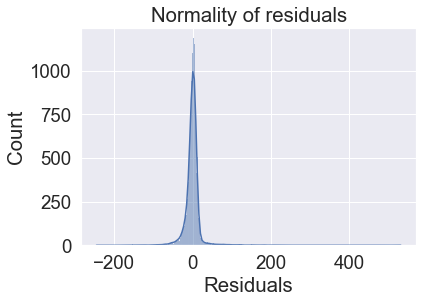

In [287]:
sns.histplot(data=df_pred_log, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

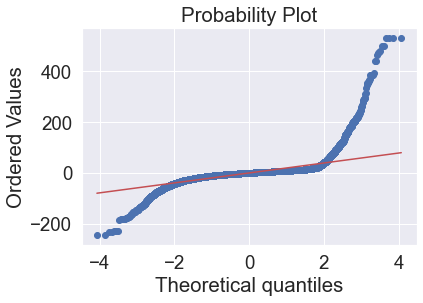

In [288]:
stats.probplot(df_pred_log["Residuals"], dist="norm", plot=pylab)
plt.show()

In [289]:
stats.shapiro(df_pred_log["Residuals"])

ShapiroResult(statistic=0.5416028499603271, pvalue=0.0)

**Observations:**
- p-value is still lower than 0.05.
- But according to the histplot and Q-Q plot, we can consider the distribution to be a good approximation of the normal distribution.

### test for homoscedasticity

In [290]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred_log["Residuals"], X_train4)
lzip(name, test)

[('F statistic', 0.9743621458126983), ('p-value', 0.9433445101552198)]

**Observations**

- Since p-value > 0.05, the residuals are homoscedastic.
- So, the assumption is satisfied.

**So here is our final multilinear regression model.**

In [291]:
print(model_MR_log.summary())

                            OLS Regression Results                            
Dep. Variable:            dropout_cnt   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                 1.152e+04
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        01:55:49   Log-Likelihood:            -1.3988e+05
No. Observations:               29755   AIC:                         2.798e+05
Df Residuals:                   29747   BIC:                         2.798e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [292]:
# Predict the values of y_valid using the trained model
x_valid_pred = X_valid4.loc[:, X_train4.columns]
y_predict = model_MR_log.predict(x_valid_pred)

In [293]:
# Calculate the RMSE, MAE, and MSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse_l = np.sqrt(mean_squared_error(y_valid, y_predict))
mae_l = mean_absolute_error(y_valid, y_predict)
mse_l = mean_squared_error(y_valid, y_predict)

# Print the results
print('RMSE:', rmse_l)
print('MAE:', mae_l)
print('MSE:', mse_l)

RMSE: 24.15988857804009
MAE: 11.450933942173018
MSE: 583.700216103312


### Part II: Poisson regression

In [294]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
rf = RandomForestClassifier(200, min_samples_leaf=5)
rf.fit(x_train, y_train.values.ravel()) #avoid the warning message
mean_absolute_error(y_valid, rf.predict(x_valid))

2.448633934872467

<AxesSubplot:ylabel='cols'>

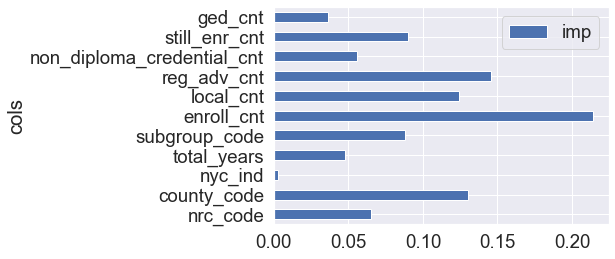

In [295]:
pd.DataFrame(dict(cols=x_train.columns, imp=rf.feature_importances_)).plot('cols','imp','barh')

**We can use the above code to check the feature importance.**

#### Split the data into train and test dataset

In [296]:
trn_df, val_df = train_test_split(df, test_size= 0.25)

y_train = trn_df['dropout_cnt']
y_valid = val_df['dropout_cnt']
x_train = trn_df.drop('dropout_cnt', axis=1)
x_valid = val_df.drop('dropout_cnt', axis=1)

### Poisson regression:
#### The first poisson regression model

In [297]:
df1 = df[['enroll_cnt','reg_adv_cnt','county_code','local_cnt','still_enr_cnt','dropout_cnt']]

In [298]:
expr = """dropout_cnt ~ enroll_cnt  + reg_adv_cnt + county_code + local_cnt + still_enr_cnt"""

In [299]:
from patsy import dmatrices
y_train, X_train = dmatrices(expr, trn_df, return_type='dataframe')
y_valid, X_valid = dmatrices(expr, val_df, return_type='dataframe')

In [300]:
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

In [301]:
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                29755
Model:                            GLM   Df Residuals:                    29749
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.9365e+05
Date:                Mon, 27 Feb 2023   Deviance:                   7.0081e+05
Time:                        01:56:04   Pearson chi2:                 1.19e+06
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.5151      0.003    719.609

**Evaluate on test dataset.**

In [302]:
# Predict y values for test data
y_pred = poisson_training_results.predict(X_valid)

# Calculate MSE, RMSE, and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_p1 = mean_squared_error(y_valid, y_pred)
rmse_p1 = np.sqrt(mse_p1)
mae_p1 = mean_absolute_error(y_valid, y_pred)

print("MSE: ", mse_p1)
print("RMSE: ", rmse_p1)
print("MAE: ", mae_p1)

MSE:  1494.288555286178
RMSE:  38.65602870557422
MAE:  14.745831487250465


In [303]:
#prediction
poisson_predictions = poisson_training_results.get_prediction(X_valid)
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

            mean   mean_se  mean_ci_lower  mean_ci_upper
9785   11.857675  0.025123      11.808536      11.907018
10700  11.548600  0.024018      11.501620      11.595771
5682   11.890539  0.030771      11.830382      11.951002
3899   11.697908  0.034282      11.630910      11.765292
35168  10.339173  0.029344      10.281821      10.396846
...          ...       ...            ...            ...
7215   12.581158  0.031792      12.519001      12.643625
8684   13.024724  0.031467      12.963196      13.086544
10723  11.433615  0.023935      11.386799      11.480624
4737   12.455733  0.034656      12.387993      12.523843
36678  10.459610  0.031874      10.397324      10.522269

[9919 rows x 4 columns]


In [304]:
sort_df=y_valid['dropout_cnt']
sort_df=pd.DataFrame(sort_df)
sort_df['mean']=predictions_summary_frame['mean']
sort_df=sort_df.sort_values(by='dropout_cnt')
sort_df=sort_df.reset_index().drop(['index'],axis=1)
sort_df

,dropout_cnt,mean
0,0.0,10.603885
1,0.0,10.737033
2,0.0,10.227520
3,0.0,9.940343
4,0.0,11.820891
...,...,...
9914,580.0,123.678694
9915,590.0,151.971983
9916,602.0,2365.286682
9917,670.0,1106.368382


<Figure size 432x288 with 0 Axes>

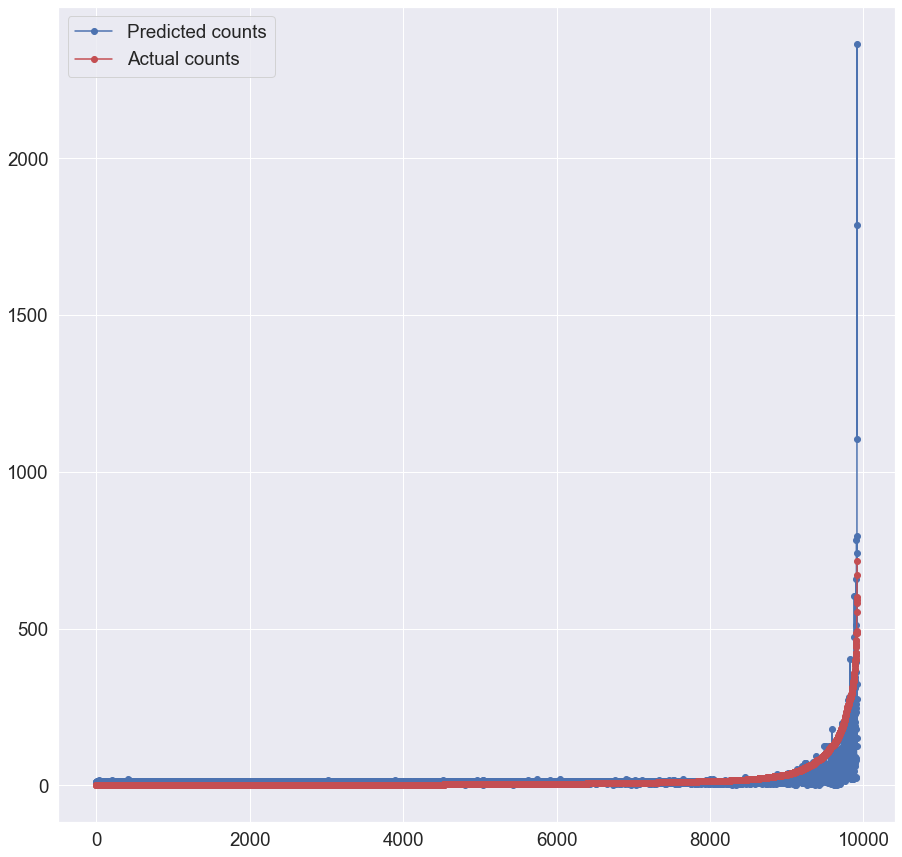

In [305]:
fig = plt.figure()
plt.figure(figsize=(15,15))
fig.suptitle('Predicted versus actual bicyclist counts on the drouput count')
predicted, = plt.plot(sort_df.index, sort_df['mean'], 'bo-', label='Predicted counts')
actual, = plt.plot(sort_df.index, sort_df['dropout_cnt'], 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

In [306]:
x_valid

,nrc_code,county_code,nyc_ind,total_years,subgroup_code,enroll_cnt,local_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt
9785,5,21,0,6,15,28,3,5,2,0,0
10700,4,22,0,5,6,10,1,2,0,0,0
5682,5,13,0,6,6,29,2,10,0,0,1
3899,4,8,0,4,16,47,1,22,0,9,0
35168,5,62,0,4,15,90,5,25,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...
7215,6,14,0,6,11,54,1,4,4,2,0
8684,4,16,0,4,1,199,25,67,5,8,0
10723,4,22,0,6,2,112,8,45,2,1,0
4737,4,10,0,4,10,94,2,23,0,14,2


In [307]:
df1

,enroll_cnt,reg_adv_cnt,county_code,local_cnt,still_enr_cnt,dropout_cnt
0,658,91,1,63,30,148
1,324,47,1,30,11,65
2,334,44,1,33,19,83
3,367,23,1,42,18,91
4,98,5,1,13,8,28
...,...,...,...,...,...,...
39669,36,3,68,2,1,9
39670,48,8,68,3,0,5
39671,13,0,68,0,2,6
39672,33,3,68,0,0,7


In [308]:
df2 = df1.copy()

### Poisson Regression
#### Part II

**Apply log function on several columns which are right skew distribution.**

In [309]:
df2['logdropout_cnt'] = np.log(df2['dropout_cnt']+1)
df2['logenroll_cnt'] = np.log(df2['enroll_cnt']+1)
df2['logreg_adv_cnt'] = np.log(df2['reg_adv_cnt']+1)
df2['loglocal_cnt'] = np.log(df2['local_cnt']+1)
df2['logstill_enr_cnt'] = np.log(df2['still_enr_cnt']+1)

<AxesSubplot:>

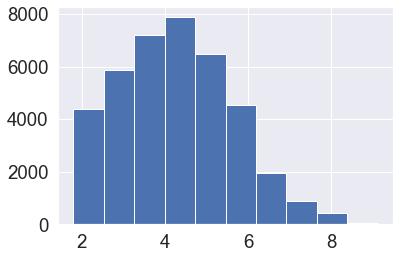

In [310]:
df2['logenroll_cnt'].hist()

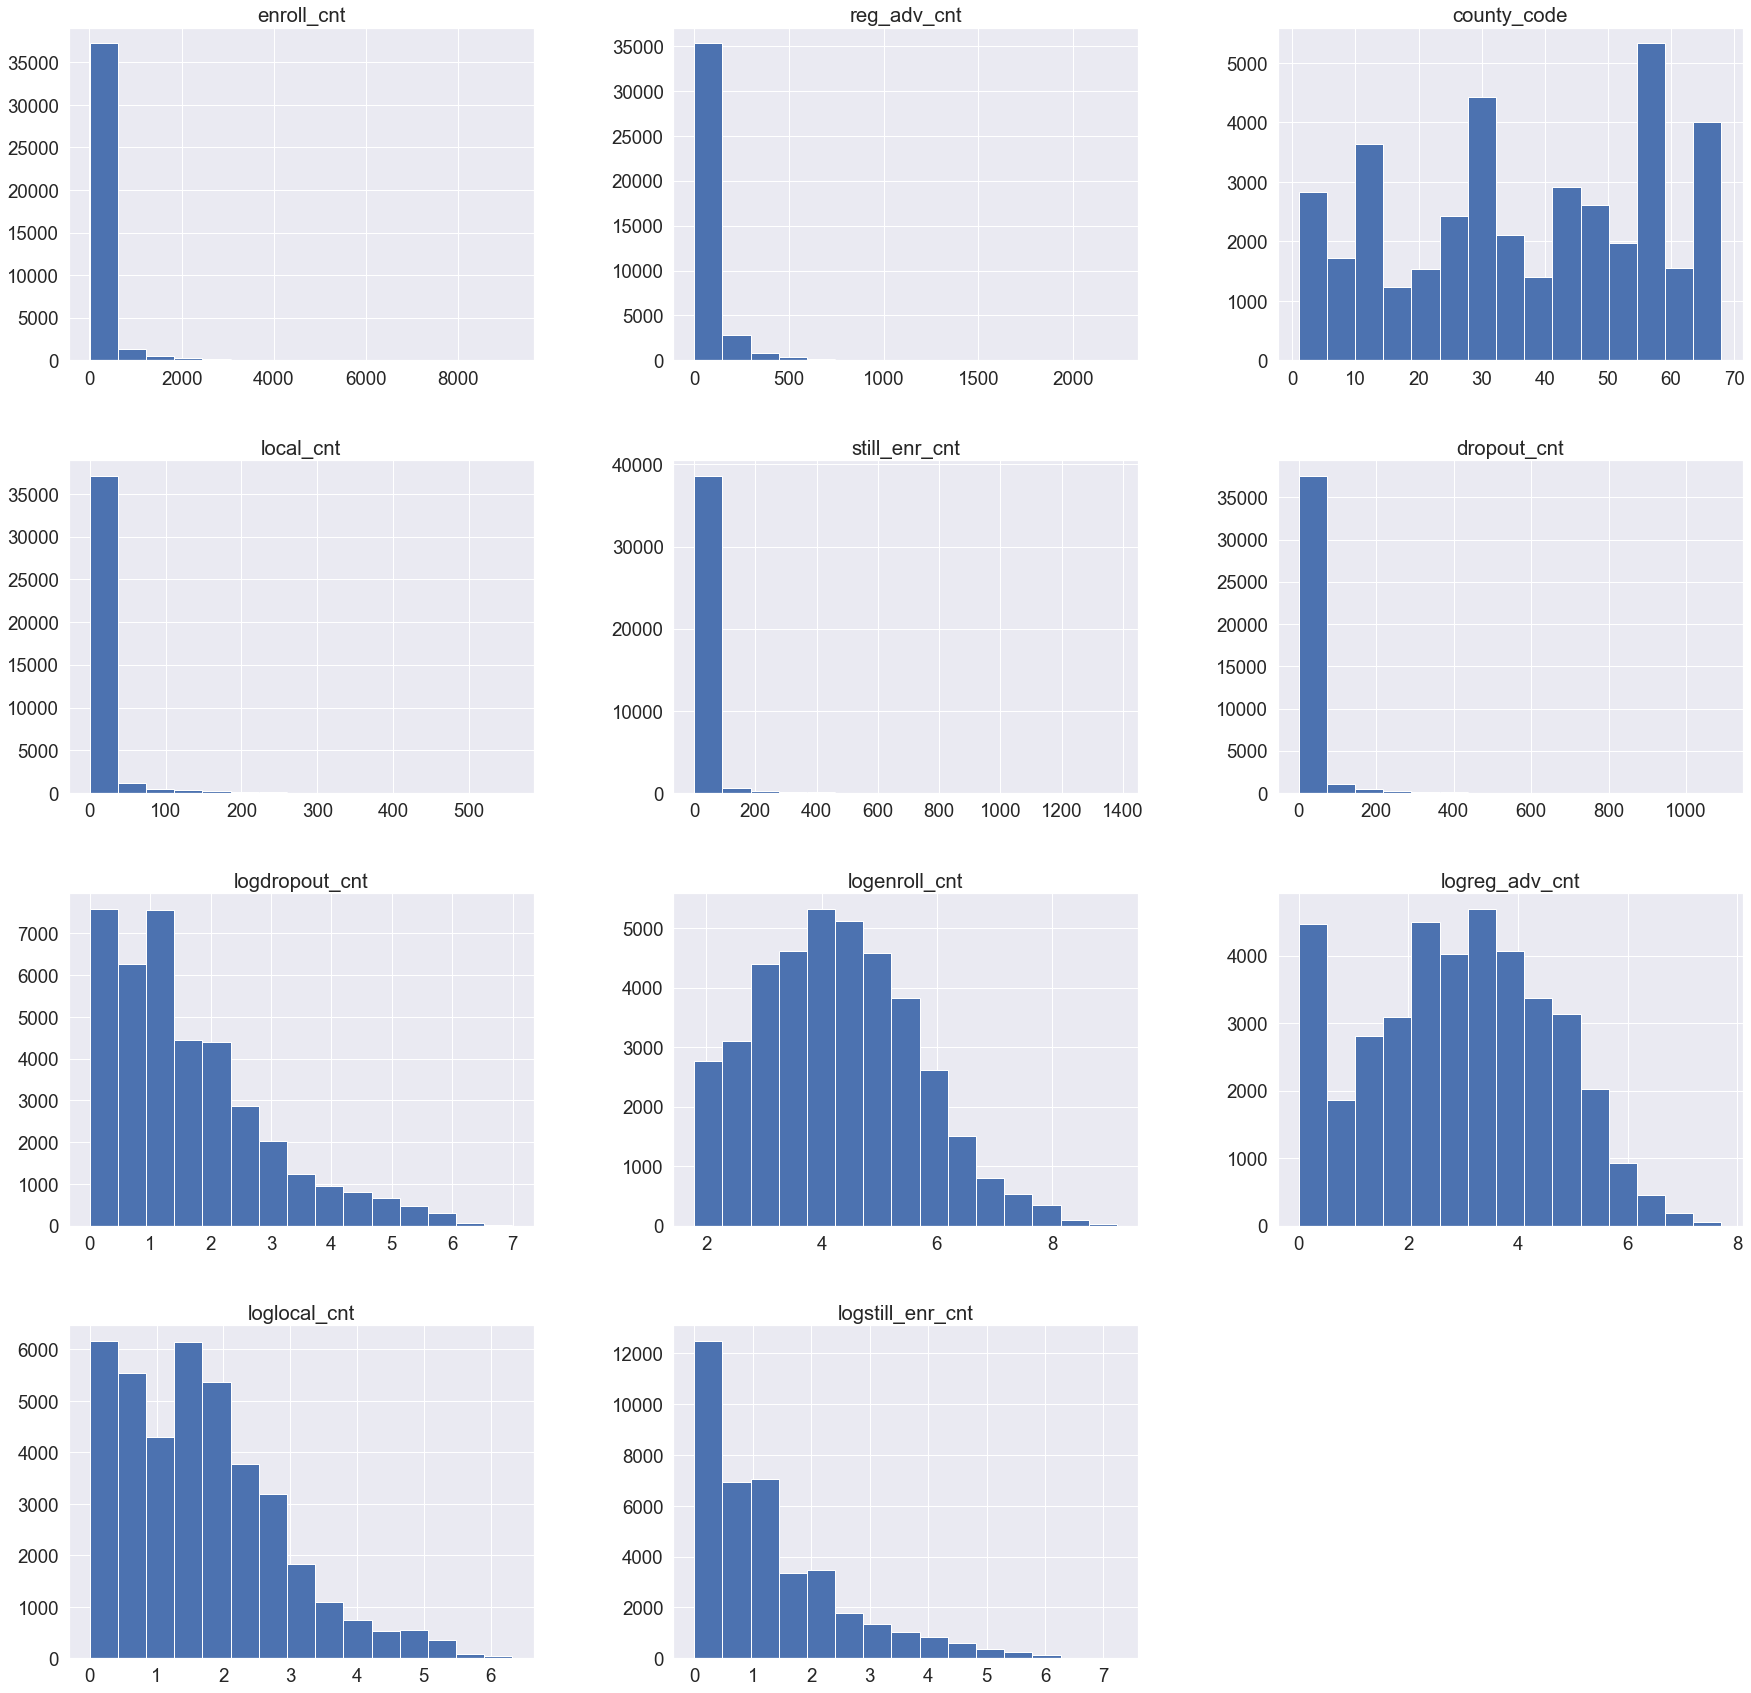

In [311]:
df2.hist(bins = 15,figsize=(30,30));

* It seems that after we log the varaibles the distribution become better.

### Retry our Poisson regression

In [312]:
expr = """logdropout_cnt ~ logenroll_cnt  + logreg_adv_cnt + county_code + loglocal_cnt + logstill_enr_cnt"""

In [313]:
trn_df2, val_df2 = train_test_split(df2, test_size= 0.25)

In [314]:
y_train2, X_train2 = dmatrices(expr, trn_df2, return_type='dataframe')
y_valid2, X_valid2 = dmatrices(expr, val_df2, return_type='dataframe')

In [315]:
poisson_training_results = sm.GLM(y_train2, X_train2, family=sm.families.Poisson()).fit()

In [316]:
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:         logdropout_cnt   No. Observations:                29755
Model:                            GLM   Df Residuals:                    29749
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -38054.
Date:                Mon, 27 Feb 2023   Deviance:                       16868.
Time:                        01:56:05   Pearson chi2:                 1.26e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.4808
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2512      0.025  

**Observations:**

- From the deviance and pearson chi2 we can notice that the model become more reasonable.

**Evaluate on the test dataset.**

In [317]:
# Predict y values for test data
y_pred = poisson_training_results.predict(X_valid2)

# Calculate MSE, RMSE, and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_p2 = mean_squared_error(y_valid, y_pred)
rmse_p2 = np.sqrt(mse_p2)
mae_p2 = mean_absolute_error(y_valid, y_pred)

print("MSE: ", mse_p2)
print("RMSE: ", rmse_p2)
print("MAE: ", mae_p2)

MSE:  2490.7236031258244
RMSE:  49.907149819698425
MAE:  15.606718198688736


In [318]:
sort_df=y_valid2['logdropout_cnt']
sort_df2=pd.DataFrame(sort_df)
sort_df2['mean']=predictions_summary_frame['mean']
sort_df2=sort_df2.sort_values(by='logdropout_cnt')
sort_df2=sort_df2.reset_index().drop(['index'],axis=1)
sort_df2

,logdropout_cnt,mean
0,0.000000,NaN
1,0.000000,NaN
2,0.000000,NaN
3,0.000000,NaN
4,0.000000,NaN
...,...,...
9914,6.432940,NaN
9915,6.453625,NaN
9916,6.467699,NaN
9917,6.642487,NaN


<Figure size 432x288 with 0 Axes>

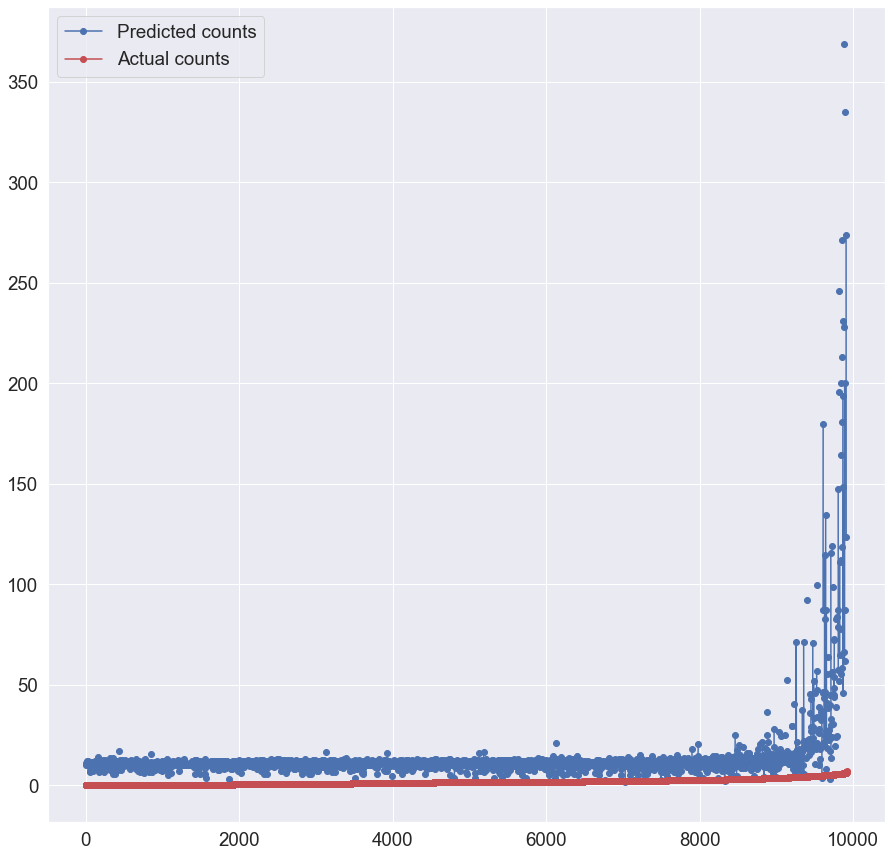

In [319]:
fig = plt.figure()
plt.figure(figsize=(15,15))
fig.suptitle('Predicted versus actual bicyclist counts on the drouput count')
predicted, = plt.plot(sort_df2.index, sort_df2['mean'], 'bo-', label='Predicted counts')
actual, = plt.plot(sort_df2.index, sort_df2['logdropout_cnt'], 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

### NBR for the first poisson regression.

In [100]:
trn_df['df_lambda'] = poisson_training_results.mu

In [101]:
trn_df['AUX_OLS_DEP'] = trn_df.apply(lambda x: ((x['df_lambda'] - 
                                                 x['df_lambda'])**2 - x['df_lambda']) / x['df_lambda'], axis=1)

In [102]:
ols_expr = """AUX_OLS_DEP ~ df_lambda - 1"""

In [103]:
import statsmodels.formula.api as smf
aux_olsr_results = smf.ols(ols_expr, trn_df).fit()

In [104]:
print(aux_olsr_results.params)

df_lambda   -0.4019
dtype: float64


In [105]:
aux_olsr_results.tvalues

df_lambda   -232.007776
dtype: float64

In [106]:
X_train.min()

Intercept        1.0
enroll_cnt       5.0
reg_adv_cnt      0.0
county_code      1.0
local_cnt        0.0
still_enr_cnt    0.0
dtype: float64

In [107]:
nb_training_results = sm.GLM(y_train, X_train,family=sm.families.NegativeBinomial(alpha=abs(aux_olsr_results.params[0]))).fit()


In [108]:
print(nb_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                29755
Model:                            GLM   Df Residuals:                    29749
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -96809.
Date:                Mon, 27 Feb 2023   Deviance:                       73725.
Time:                        01:42:24   Pearson chi2:                 7.77e+04
No. Iterations:                    58   Pseudo R-squ. (CS):             0.9765
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.4892      0.010    155.616

In [109]:
# Predict y values for test data
y_pred = nb_training_results.predict(X_valid)

# Calculate MSE, RMSE, and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_n1 = mean_squared_error(y_valid, y_pred)
rmse_n1 = np.sqrt(mse_n1)
mae_n1 = mean_absolute_error(y_valid, y_pred)

print("MSE: ", mse_n1)
print("RMSE: ", rmse_n1)
print("MAE: ", mae_n1)

MSE:  1.8786494487648297e+19
RMSE:  4334338990.855272
MAE:  56396004.30506246


In [322]:
sort_df=y_valid['dropout_cnt']
sort_df2=pd.DataFrame(sort_df)
sort_df2['mean']=predictions_summary_frame['mean']
sort_df2=sort_df2.sort_values(by='dropout_cnt')
sort_df2=sort_df2.reset_index().drop(['index'],axis=1)
sort_df2

,dropout_cnt,mean
0,0.0,10.603885
1,0.0,10.737033
2,0.0,10.227520
3,0.0,9.940343
4,0.0,11.820891
...,...,...
9914,580.0,123.678694
9915,590.0,151.971983
9916,602.0,2365.286682
9917,670.0,1106.368382


<Figure size 432x288 with 0 Axes>

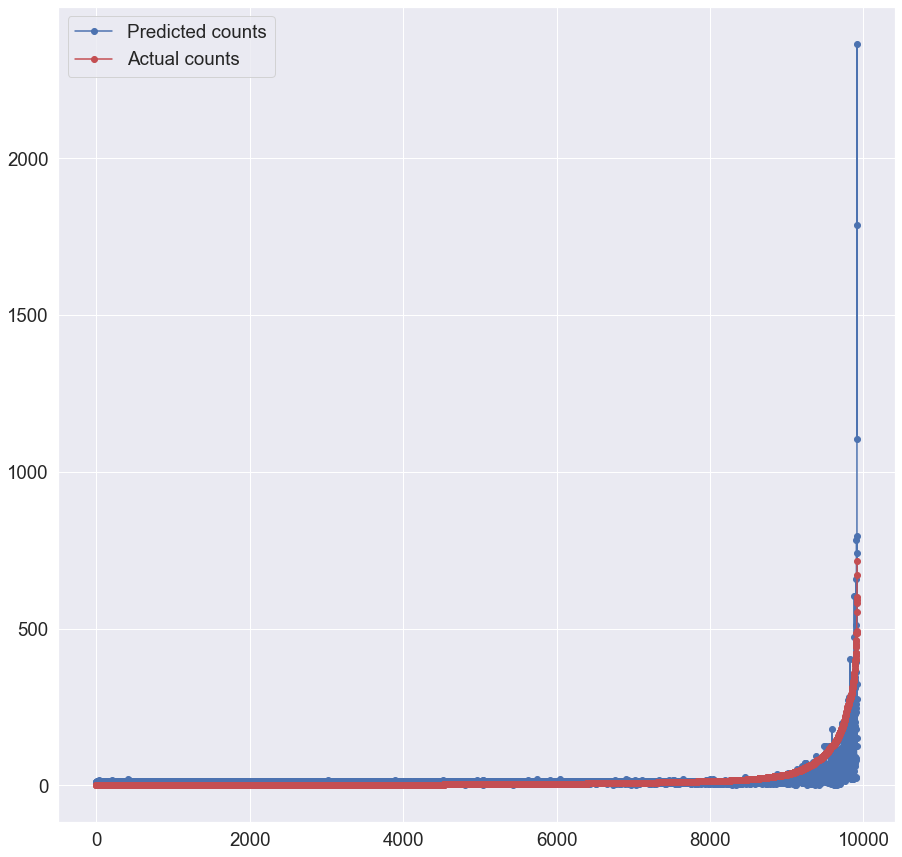

In [323]:
fig = plt.figure()
plt.figure(figsize=(15,15))
fig.suptitle('Predicted versus actual bicyclist counts on the drouput count')
predicted, = plt.plot(sort_df2.index, sort_df2['mean'], 'bo-', label='Predicted counts')
actual, = plt.plot(sort_df2.index, sort_df2['dropout_cnt'], 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

### NBF for the second Poisson regression

In [324]:
trn_df2['df_lambda'] = poisson_training_results.mu

In [325]:
trn_df2['AUX_OLS_DEP'] = trn_df2.apply(lambda x: ((x['df_lambda'] - 
                                                 x['df_lambda'])**2 - x['df_lambda']) / x['df_lambda'], axis=1)

In [326]:
ols_expr = """AUX_OLS_DEP ~ df_lambda - 1"""

In [327]:
aux_olsr_results = smf.ols(ols_expr, trn_df2).fit()

In [328]:
print(aux_olsr_results.params)

df_lambda   -0.401846
dtype: float64


In [329]:
aux_olsr_results.tvalues

df_lambda   -231.585242
dtype: float64

In [330]:
nb2_training_results = sm.GLM(y_train2, X_train2,family=sm.families.NegativeBinomial(alpha=abs(aux_olsr_results.params[0]))).fit()


In [331]:
print(nb2_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:         logdropout_cnt   No. Observations:                29755
Model:                            GLM   Df Residuals:                    29749
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -42824.
Date:                Mon, 27 Feb 2023   Deviance:                       12457.
Time:                        01:59:15   Pearson chi2:                 8.46e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3234
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.4243      0.033  

In [332]:
# Predict y values for test data
y_pred = nb2_training_results.predict(X_valid2)

# Calculate MSE, RMSE, and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_n2 = mean_squared_error(y_valid, y_pred)
rmse_n2 = np.sqrt(mse_n2)
mae_n2 = mean_absolute_error(y_valid, y_pred)

print("MSE: ", mse_n2)
print("RMSE: ", rmse_n2)
print("MAE: ", mae_n2)

MSE:  2490.1403988269317
RMSE:  49.901306584366424
MAE:  15.6241094508314


In [333]:
sort_df=y_valid2['logdropout_cnt']
sort_df2=pd.DataFrame(sort_df)
sort_df2['mean']=predictions_summary_frame['mean']
sort_df2=sort_df2.sort_values(by='logdropout_cnt')
sort_df2=sort_df2.reset_index().drop(['index'],axis=1)
sort_df2

,logdropout_cnt,mean
0,0.000000,NaN
1,0.000000,NaN
2,0.000000,NaN
3,0.000000,NaN
4,0.000000,NaN
...,...,...
9914,6.432940,NaN
9915,6.453625,NaN
9916,6.467699,NaN
9917,6.642487,NaN


<Figure size 432x288 with 0 Axes>

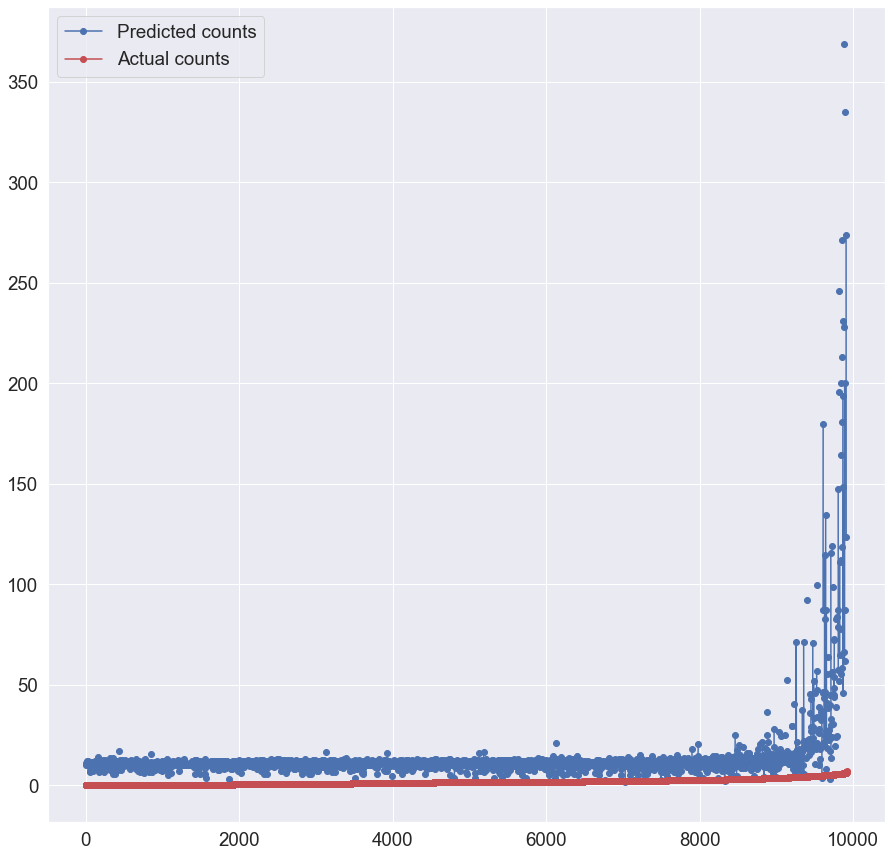

In [334]:
fig = plt.figure()
plt.figure(figsize=(15,15))
fig.suptitle('Predicted versus actual bicyclist counts on the drouput count')
predicted, = plt.plot(sort_df2.index, sort_df2['mean'], 'bo-', label='Predicted counts')
actual, = plt.plot(sort_df2.index, sort_df2['logdropout_cnt'], 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

**Observations:**

- From the Deviance and Pearson chi2 negetive binomial regression is better than Poisson regression.
                    

### Compare performance of different regression models

**Metric of Linear regression model:**

In [336]:
print('RMSE:', rmse_l)
print('MAE:', mae_l)
print('MSE:', mse_l)

RMSE: 24.15988857804009
MAE: 11.450933942173018
MSE: 583.700216103312


**Metric of first poisson regression model:**

In [337]:
print('RMSE:', rmse_p1)
print('MAE:', mae_p1)
print('MSE:', mse_p1)

RMSE: 38.65602870557422
MAE: 14.745831487250465
MSE: 1494.288555286178


**Metric of second poisson regression model:**

In [338]:
print('RMSE:', rmse_p2)
print('MAE:', mae_p2)
print('MSE:', mse_p2)

RMSE: 49.907149819698425
MAE: 15.606718198688736
MSE: 2490.7236031258244


**Metric of first negative binominal regression model:**

In [339]:
print('RMSE:', rmse_n1)
print('MAE:', mae_n1)
print('MSE:', mse_n1)

RMSE: 4334338990.855272
MAE: 56396004.30506246
MSE: 1.8786494487648297e+19


**Metric of second negative binominal regression model:**

In [340]:
print('RMSE:', rmse_n2)
print('MAE:', mae_n2)
print('MSE:', mse_n2)

RMSE: 49.901306584366424
MAE: 15.6241094508314
MSE: 2490.1403988269317


# Conclusion
* Basicly, negative binominal regression model performs statistically better than model poisson regression.
* Why is the performance of linear regression better than NBR and poisson that specifically predict the target variable?
* The processing method of subgroup_code and other categorical columns, after converting them into dummy variables in linear regression, after we check the VIF, the VIF of these dummy variables is particularly high, and all of them must be removed when they reach the point of inf. But if we don't convert them to dummy variables, they will still be removed from the model because they have high p-value.
* Do NBR and Poisson regression also need to be converted to dummy variable when facing the third problem?